In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('healthcare_dataset_new.csv')

In [5]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [6]:
df.shape

(55500, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
df.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224655    202.000000
50%       52.000000    25538.069380    302.000000
75%       68.000000    37820.508432    401.000000
max       89.000000    52764.276740    500.000000

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.duplicated().sum()

534

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [14]:
cat_columns = df.select_dtypes(include = 'object').columns
num_columns = df.select_dtypes(include = ['int64','float64']).columns

In [15]:
print(cat_columns)

Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


In [16]:
print(num_columns)

Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')


In [17]:
def feature_separation(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df :
        if df[column].dtype == 'object':
            if df[column].nunique() <=10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() <= 10:
                distcrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features,non_categorical_features,discrete_features,continuous_features
            

In [18]:
categorical_features,non_categorical_features,discrete_features,continuous_features = feature_separation(df)

In [19]:
categorical_features

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [20]:
non_categorical_features

['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date']

In [21]:
discrete_features

[]

In [22]:
continuous_features

['Age', 'Billing Amount', 'Room Number']

In [23]:
for i in categorical_features:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts())
    print('********************************************************************')

Gender
['Male' 'Female']
Gender
Male      27496
Female    27470
Name: count, dtype: int64
********************************************************************
Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
********************************************************************
Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
********************************************************************
Insurance Provider
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64
****

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\681727764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= i,data=df, palette = 'hls')


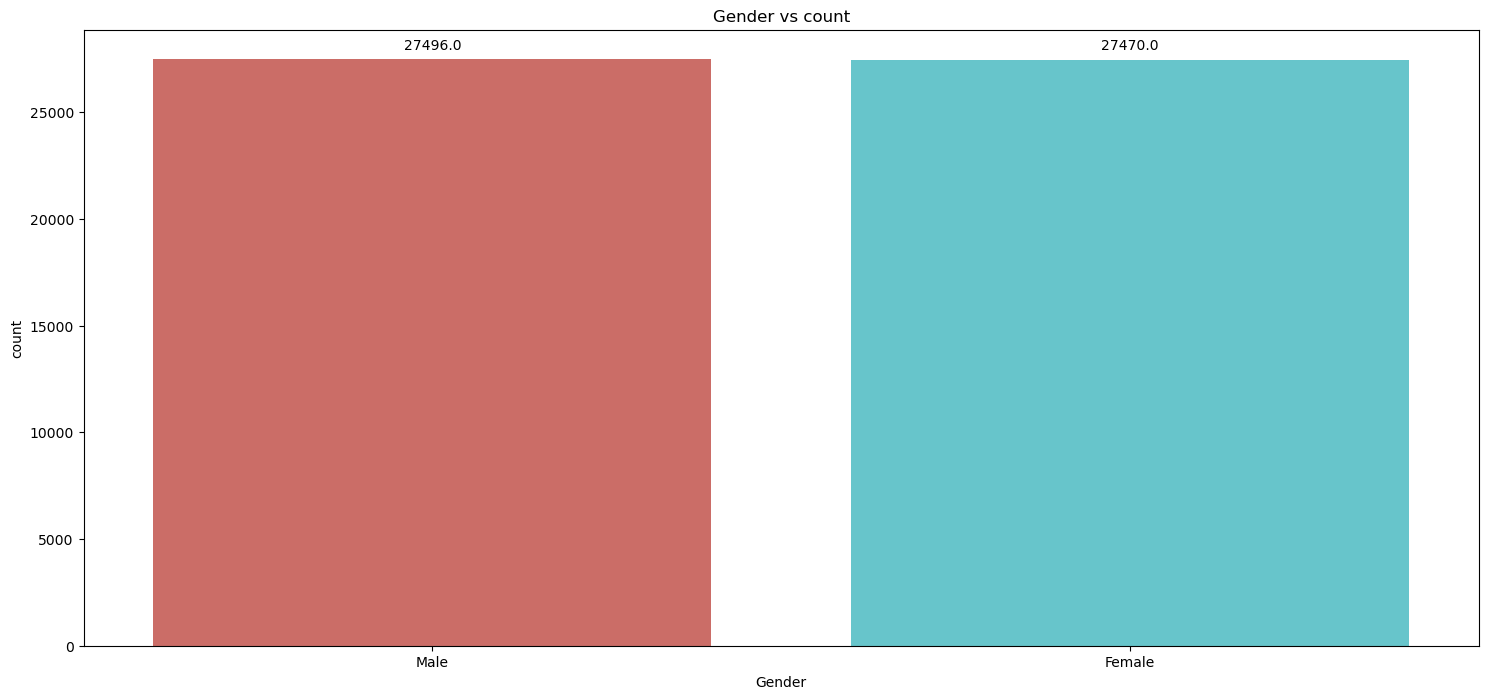

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\681727764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= i,data=df, palette = 'hls')


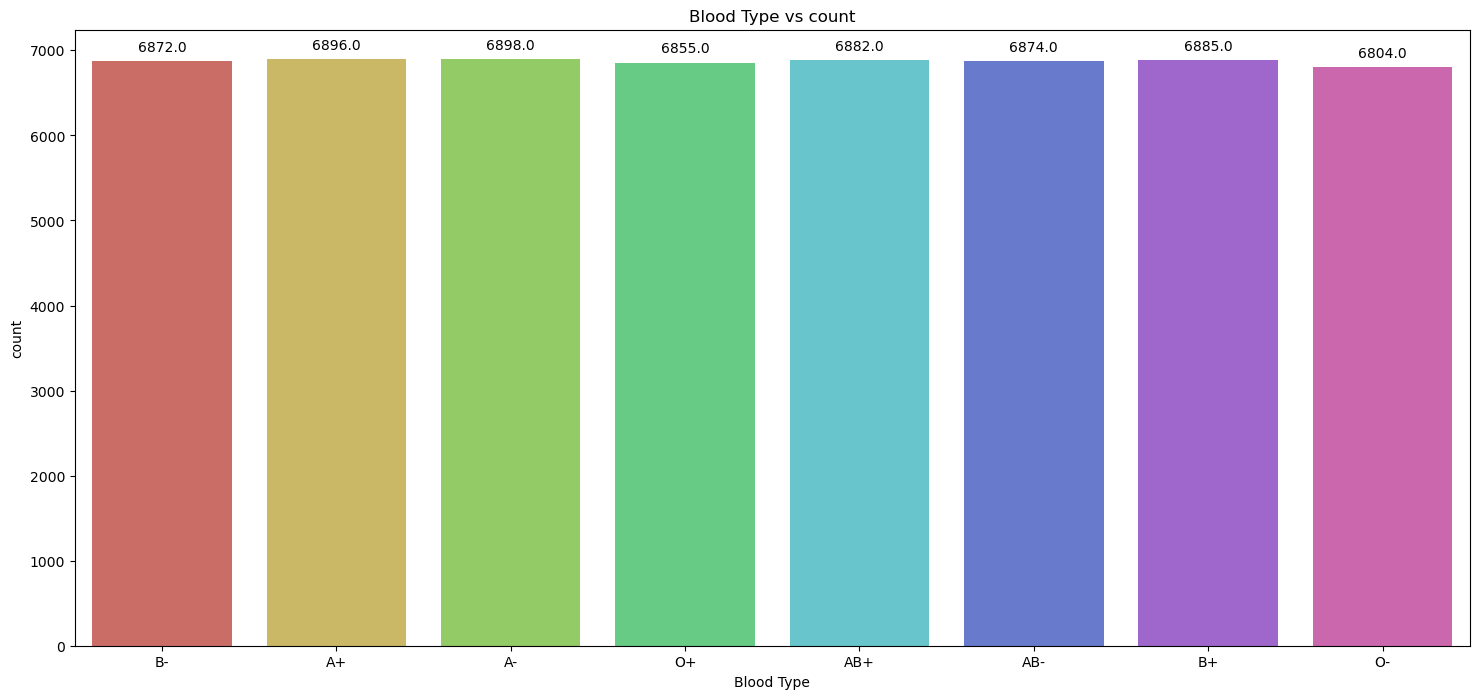

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\681727764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= i,data=df, palette = 'hls')


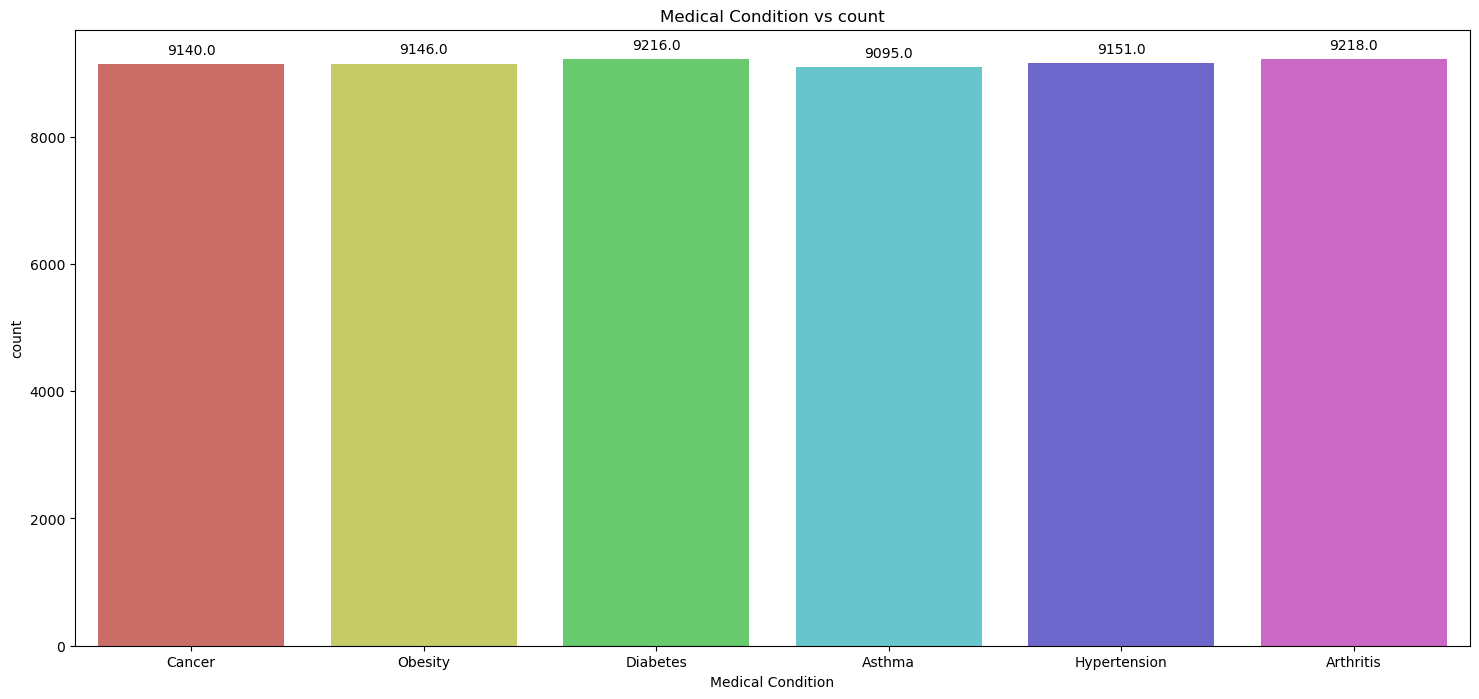

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\681727764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= i,data=df, palette = 'hls')


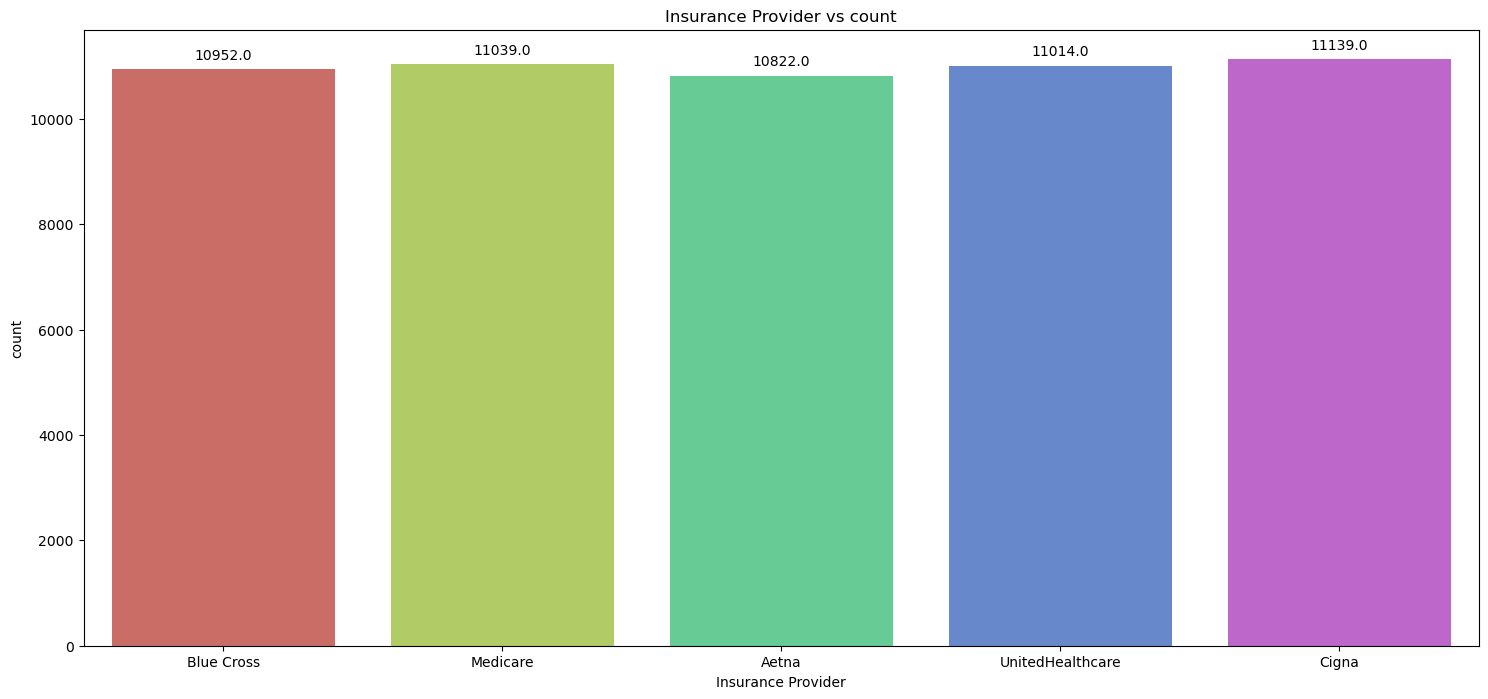

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\681727764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= i,data=df, palette = 'hls')


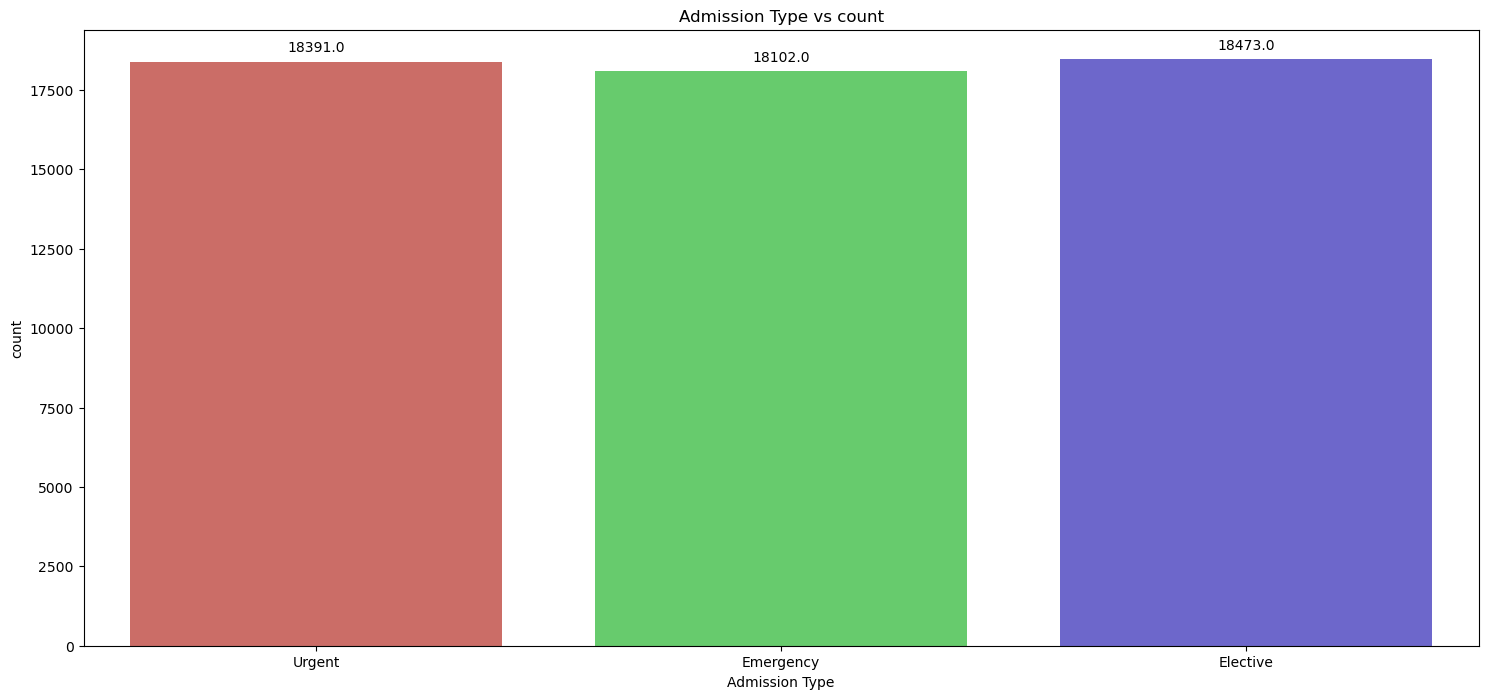

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\681727764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= i,data=df, palette = 'hls')


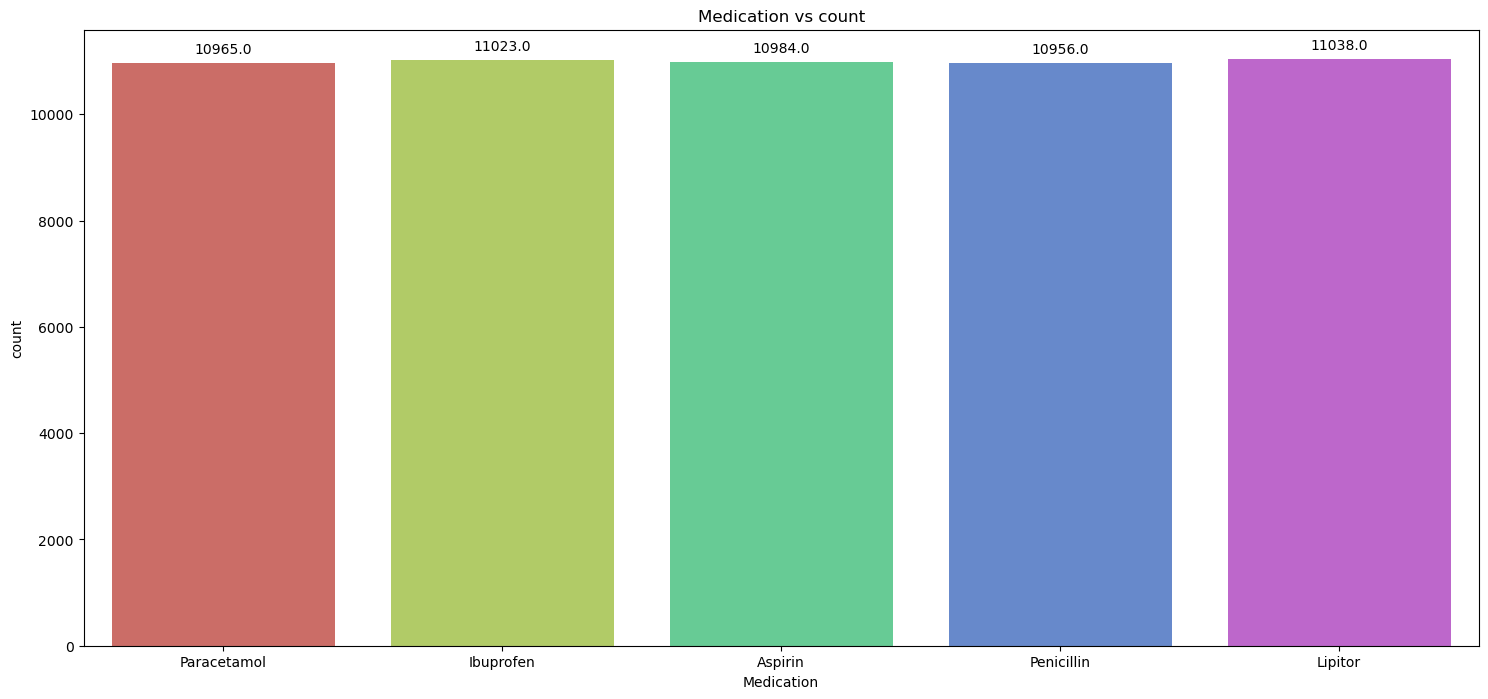

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\681727764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x= i,data=df, palette = 'hls')


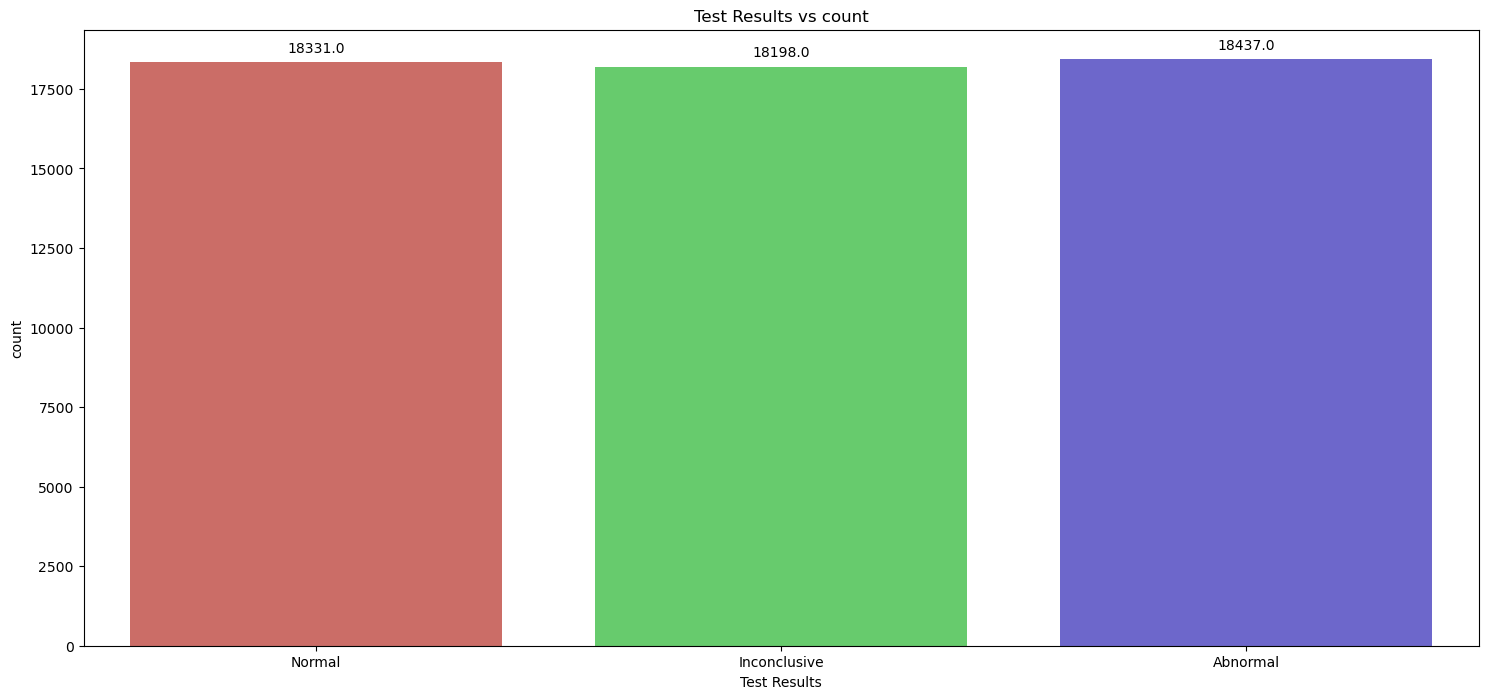

In [24]:
for i in categorical_features:
    plt.figure(figsize = (18,8))
    ax= sns.countplot(x= i,data=df, palette = 'hls')
    plt.title(f'{i} vs count')
    for p in ax.patches:
        height  = p.get_height()
        ax.annotate(f'{height}' ,xy= (p.get_x()+ p.get_width()/2.,height),xytext=(0,10),textcoords='offset points',ha = 'center',va = 'center')
    plt.show()

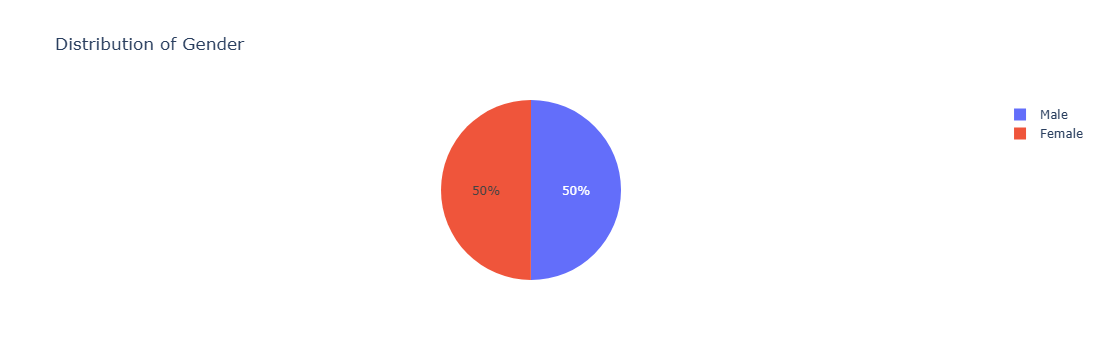

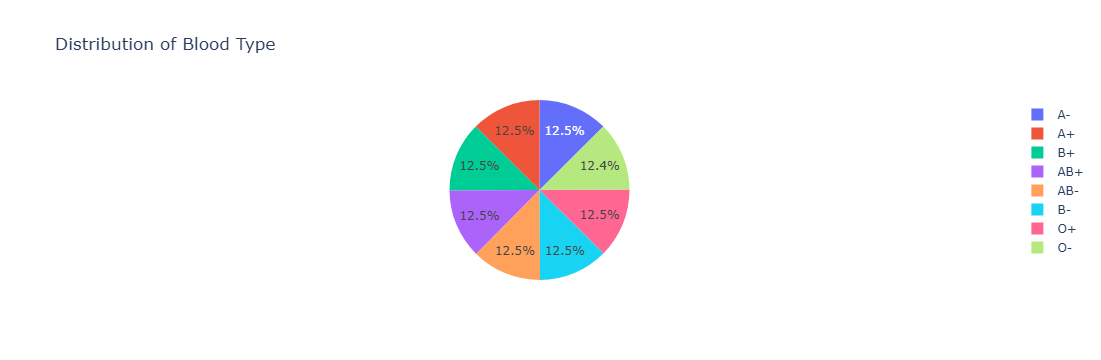

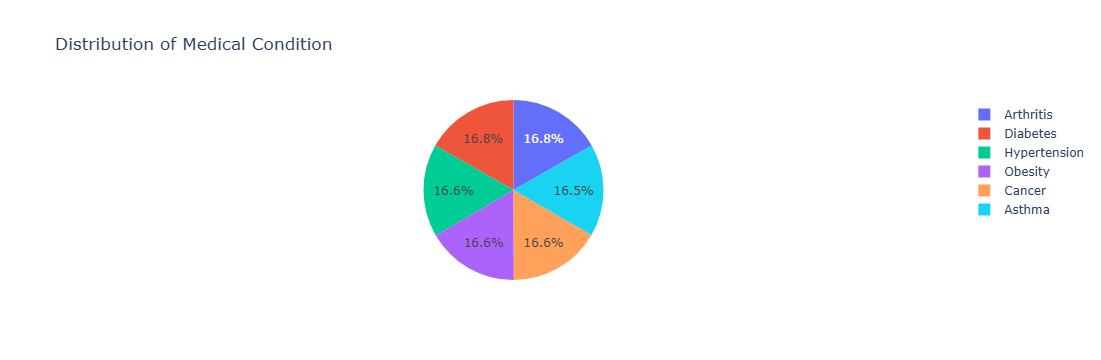

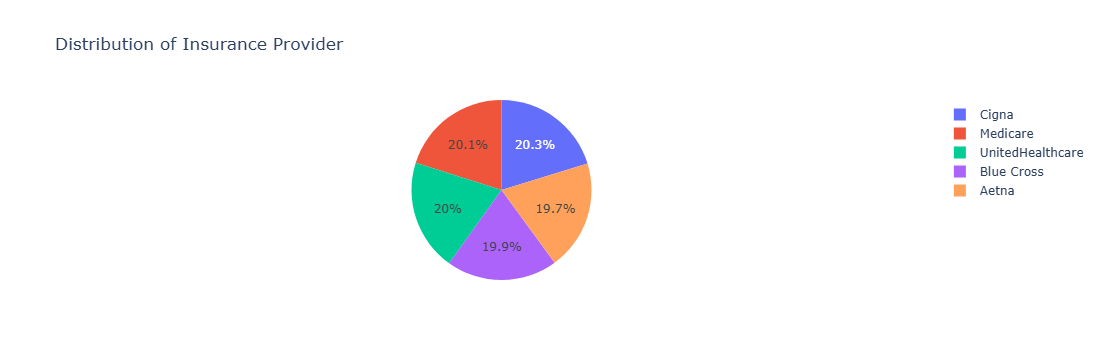

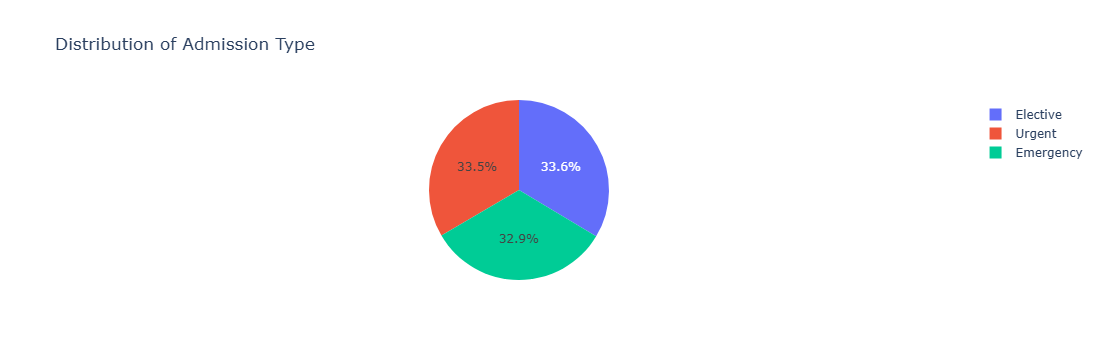

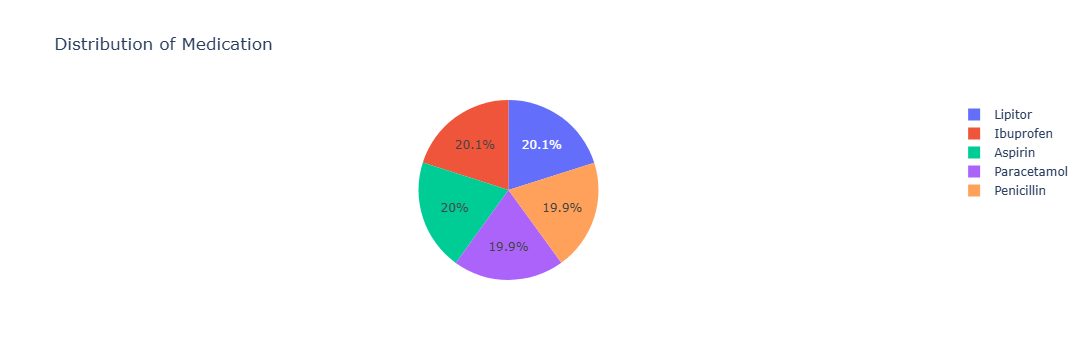

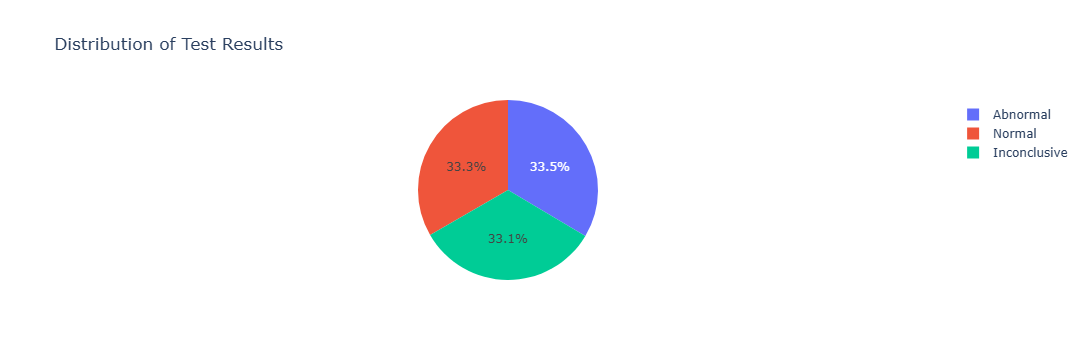

In [25]:
import plotly.express as px
for i in categorical_features:
    fig = px.pie(df[i].value_counts(),values = df[i].value_counts().values,names = df[i].value_counts().index,title = f'Distribution of {i}')
    fig.show()

In [26]:
continuous_features

['Age', 'Billing Amount', 'Room Number']

In [66]:
for i in continuous_features:
    print(i)
    print(df[i].unique())
    print('********************************************************************')

Age
[30 62 76 28 43 36 21 20 82 58 72 38 75 68 44 46 63 34 67 48 59 73 51 23
 78 25 33 26 70 57 74 81 49 65 31 22 77 42 24 84 55 40 83 18 27 19 29 61
 80 60 35 79 53 69 47 85 52 37 50 32 54 45 66 39 56 64 71 41 88 17 87 86
 15 16 13 14 89]
********************************************************************
Billing Amount
[18856.28131  33643.32729  27955.09608  ...  8441.147064 34934.28411
  8926.285937]
********************************************************************
Room Number
[328 265 205 450 458 389 277 316 249 394 288 134 309 182 465 114 449 260
 115 295 327 119 109 162 401 157 223 293 371 108 245 494 285 228 481 212
 113 272 478 196 418 410 300 211 413 138 456 234 492 180 250 296 330 405
 306 333 244 325 378 468 368 263 489 241 231 377 407 135 131 102 255 422
 320 273 395 152 321 428 482 268 120 318 144 226 459 208 227 402 442 425
 373 290 361 251 440 414 424 307 476 388 326 178 177 302 130 430 133 104
 408 376 331 275 480 233 384 380 310 406 213 427 500 451 485 267 154 466


C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2150383207.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



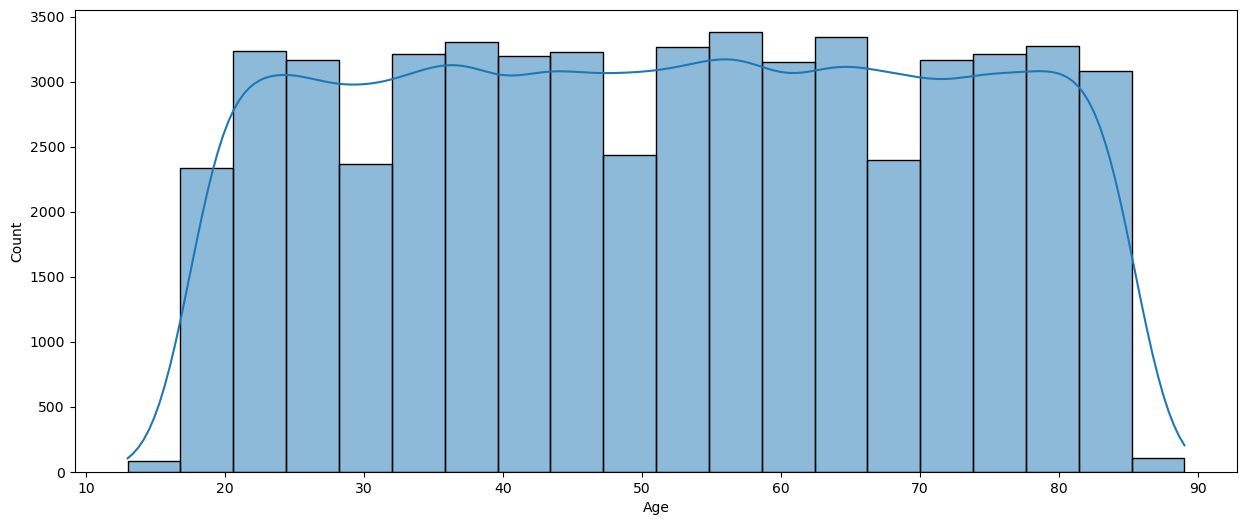

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2150383207.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



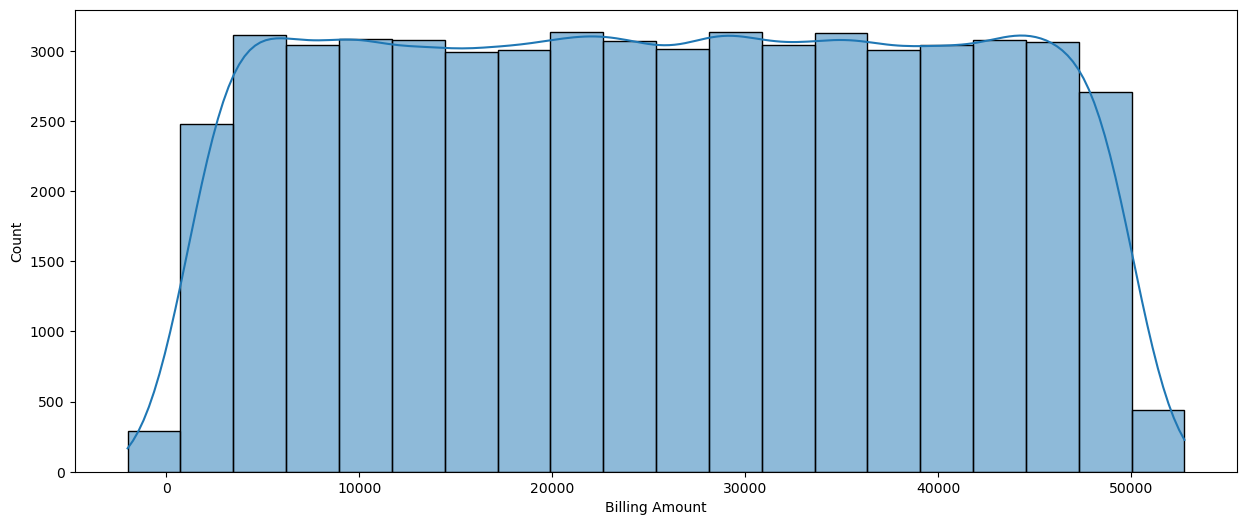

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2150383207.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



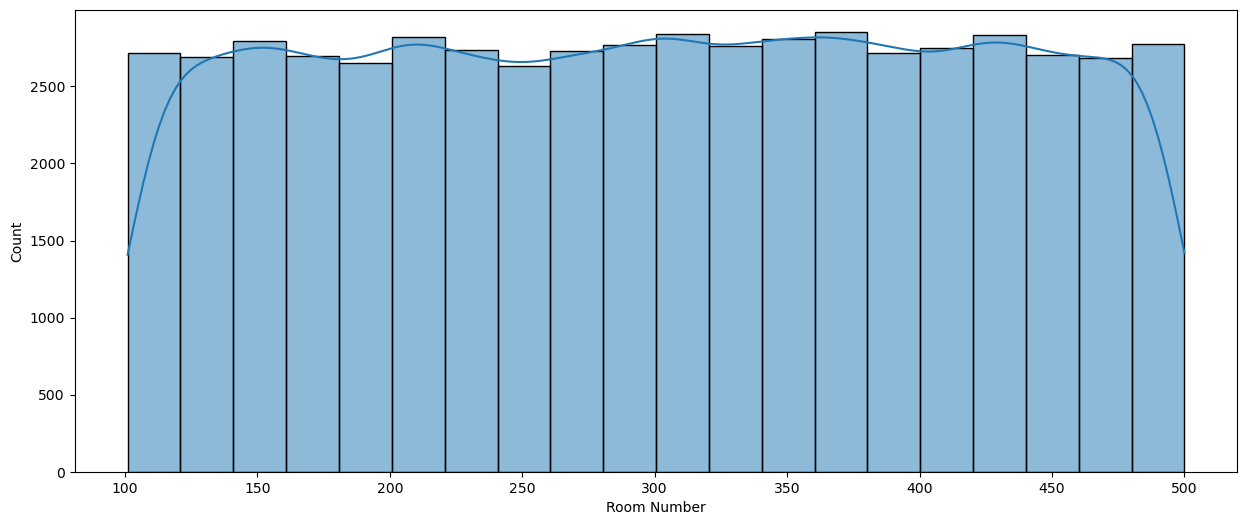

In [28]:
for i in continuous_features:
    plt.figure(figsize = (15,6))
    sns.histplot(df[i], bins = 20 , kde = True, palette = 'hls')
    plt.show()

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2639042485.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




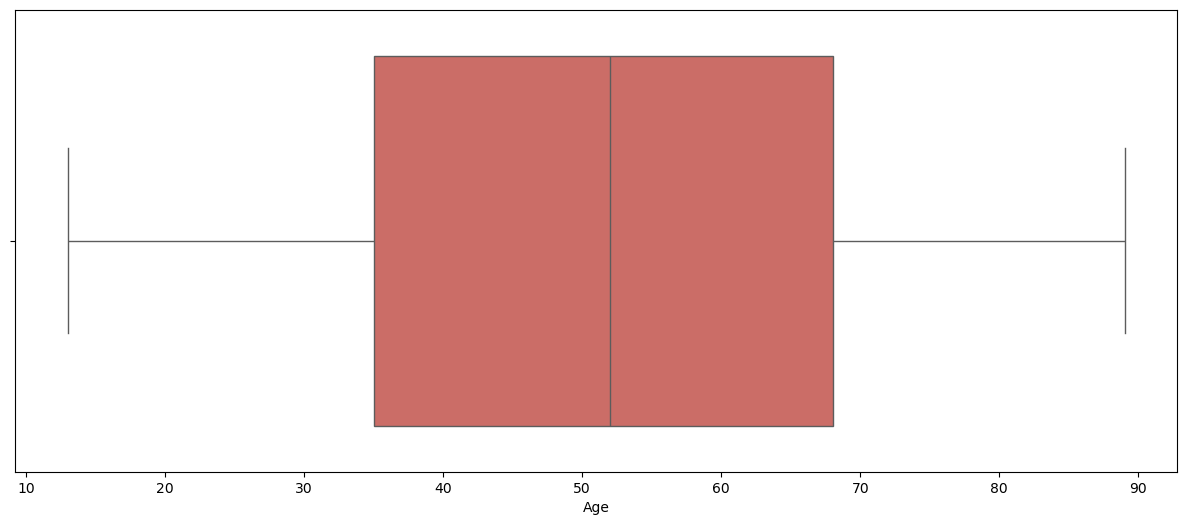

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2639042485.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




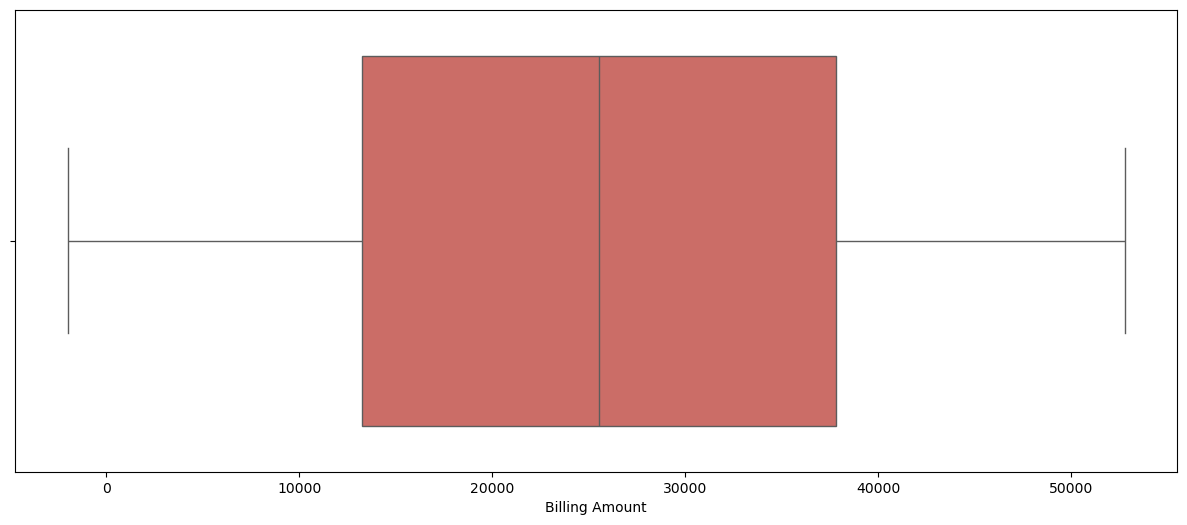

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2639042485.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




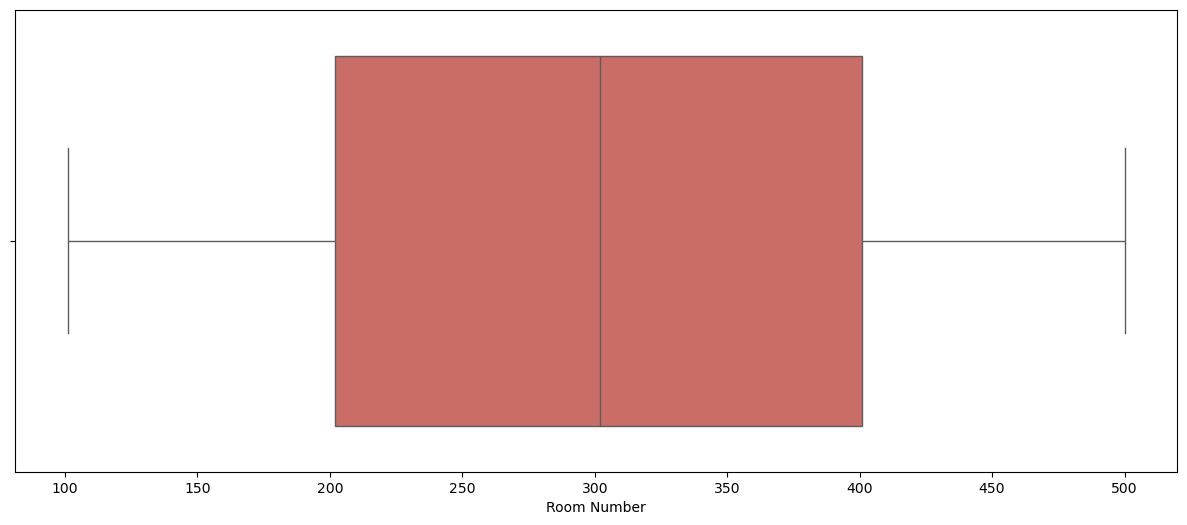

In [29]:
for i in continuous_features:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = i,data = df, palette='hls')
    plt.show()

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




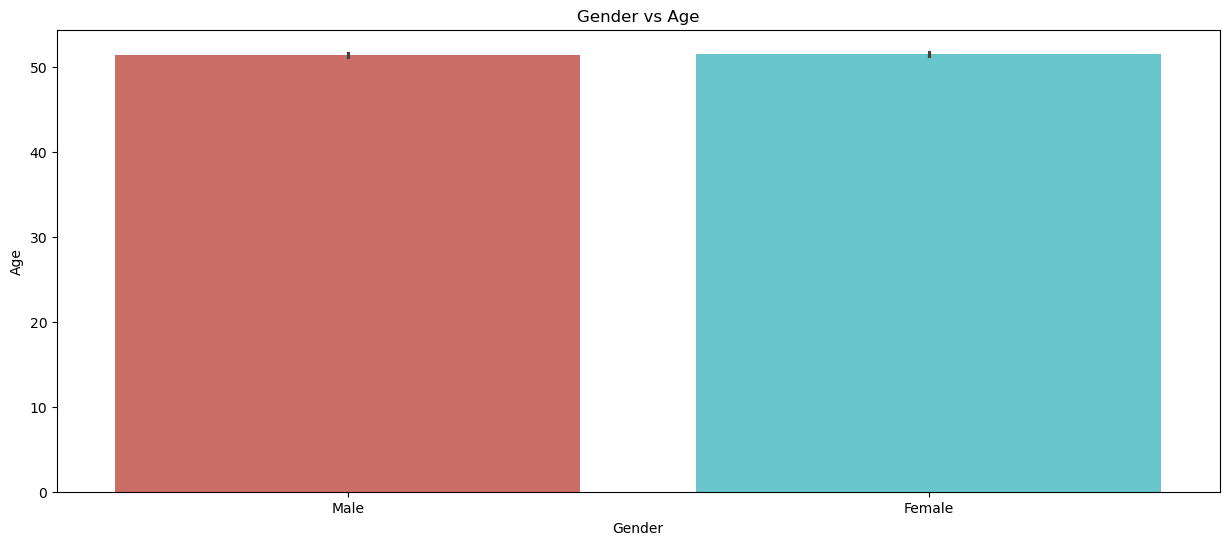

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




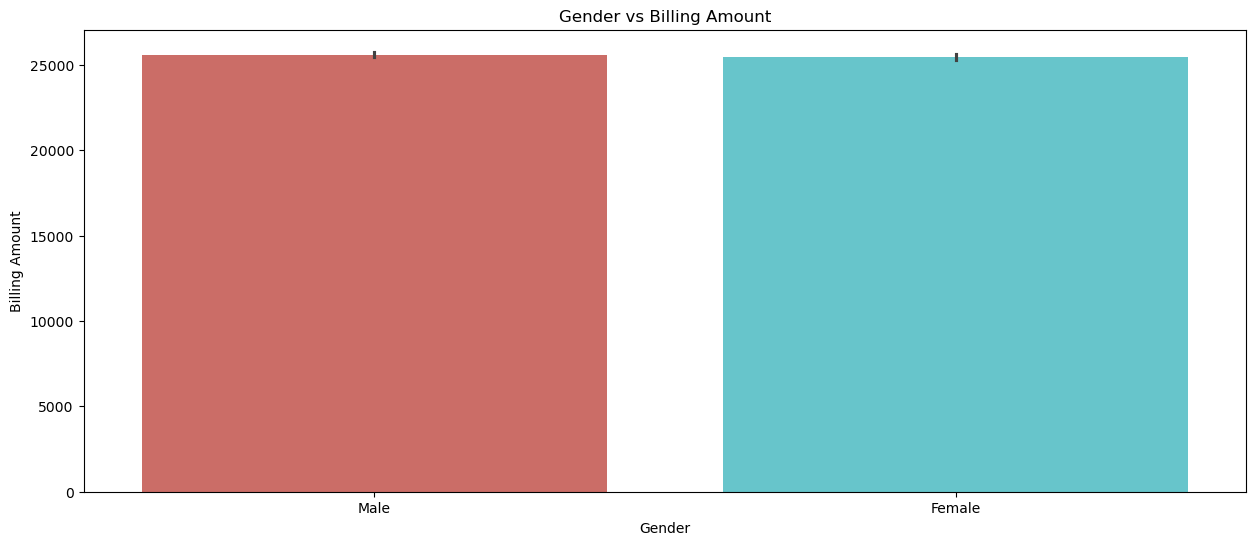

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




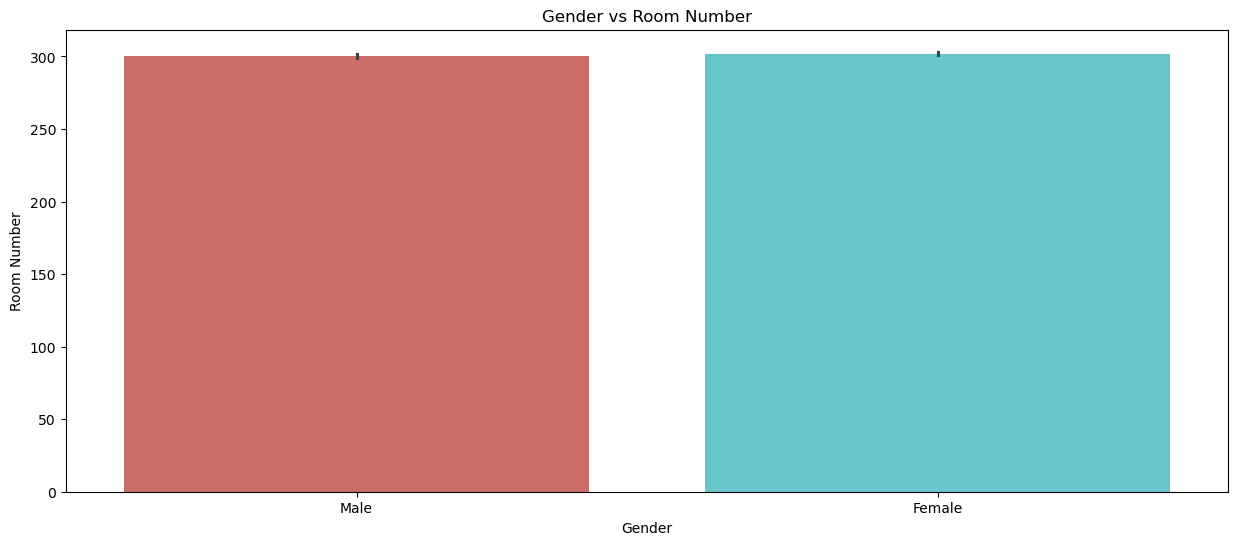

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




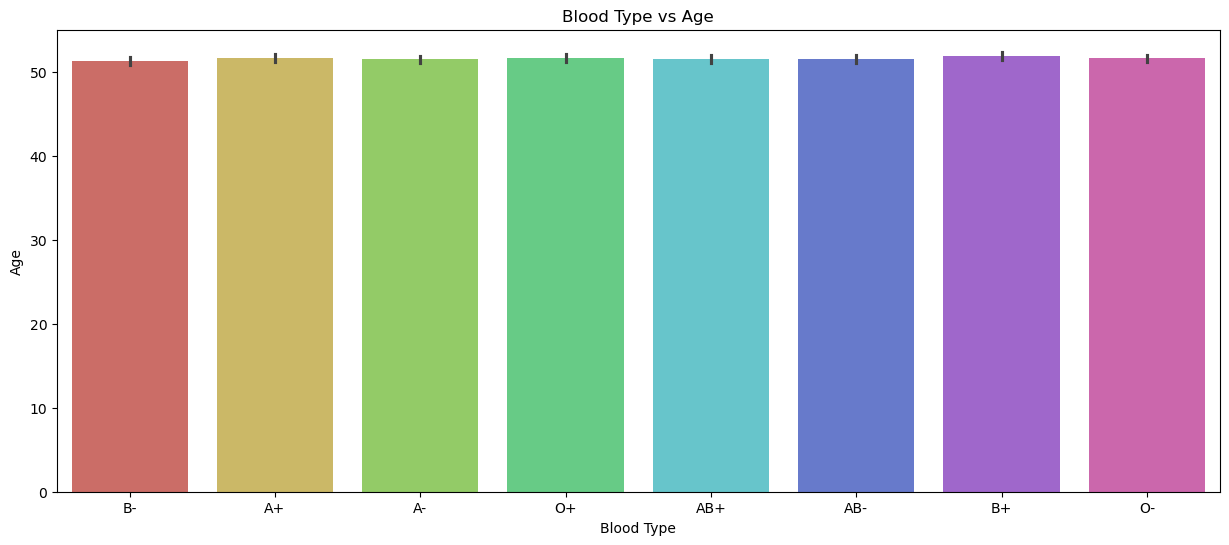

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




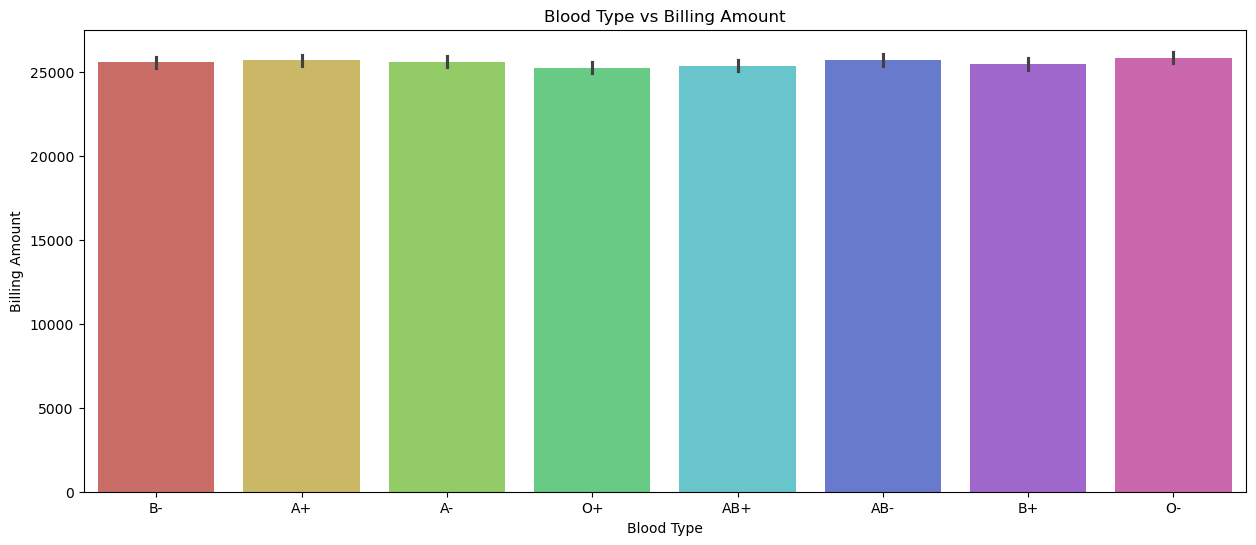

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




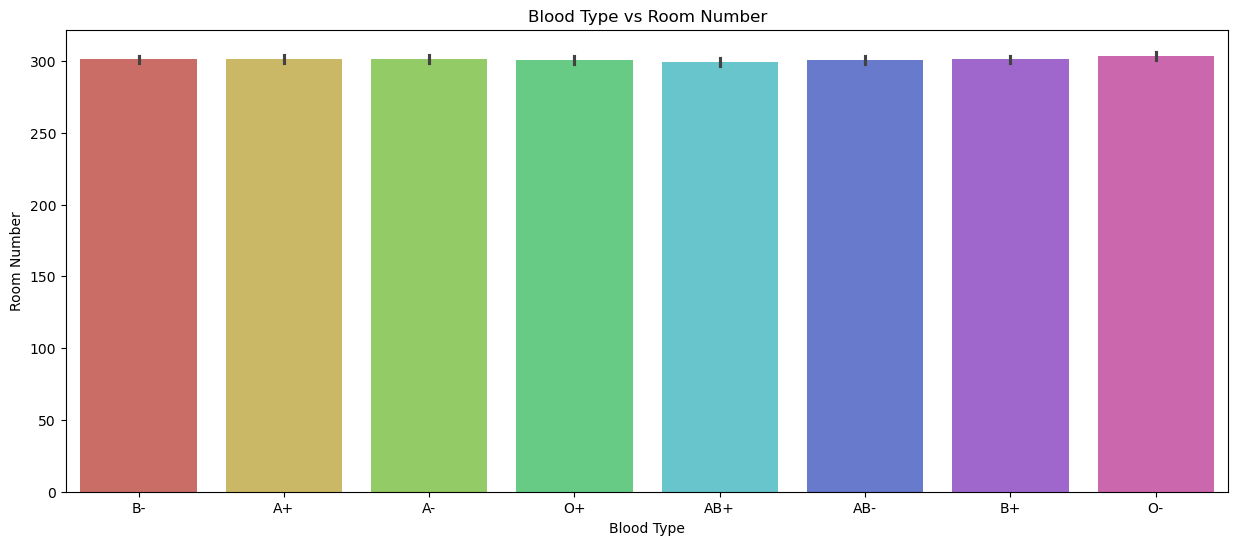

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




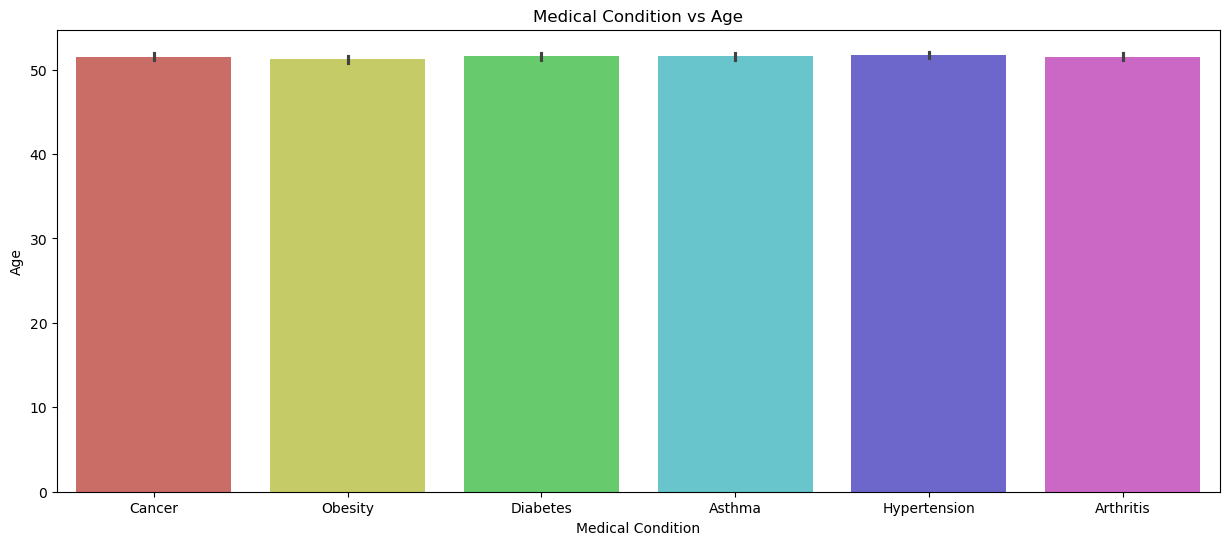

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




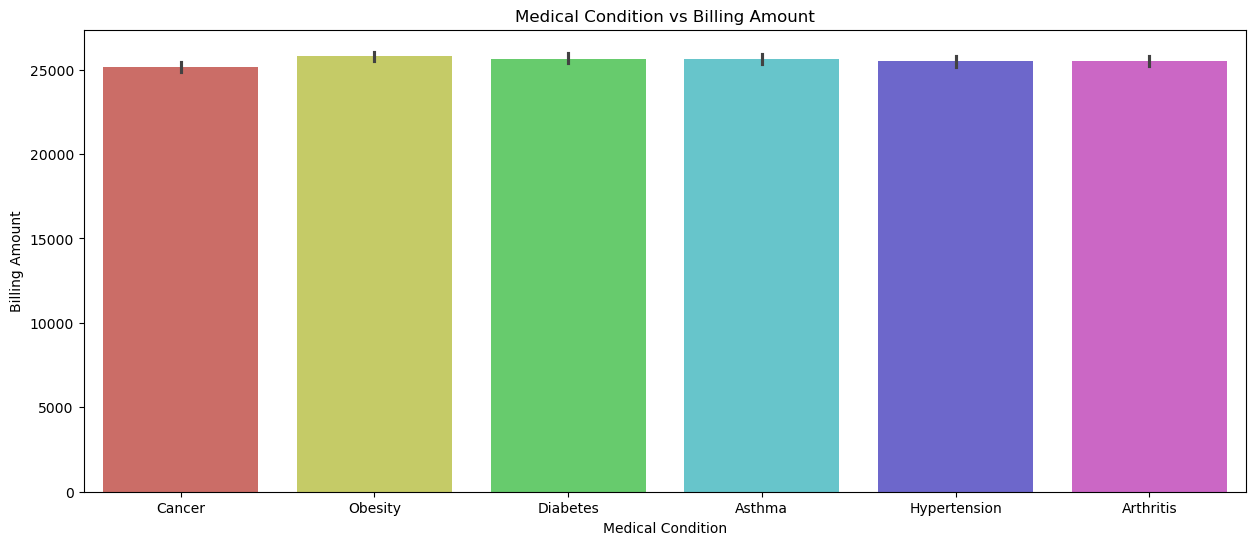

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




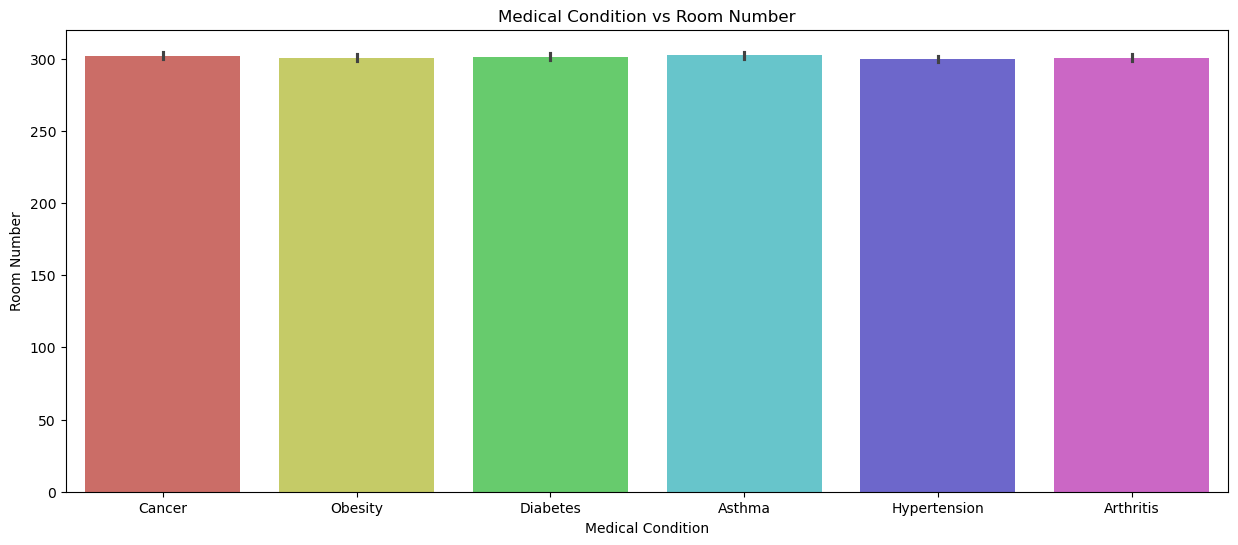

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




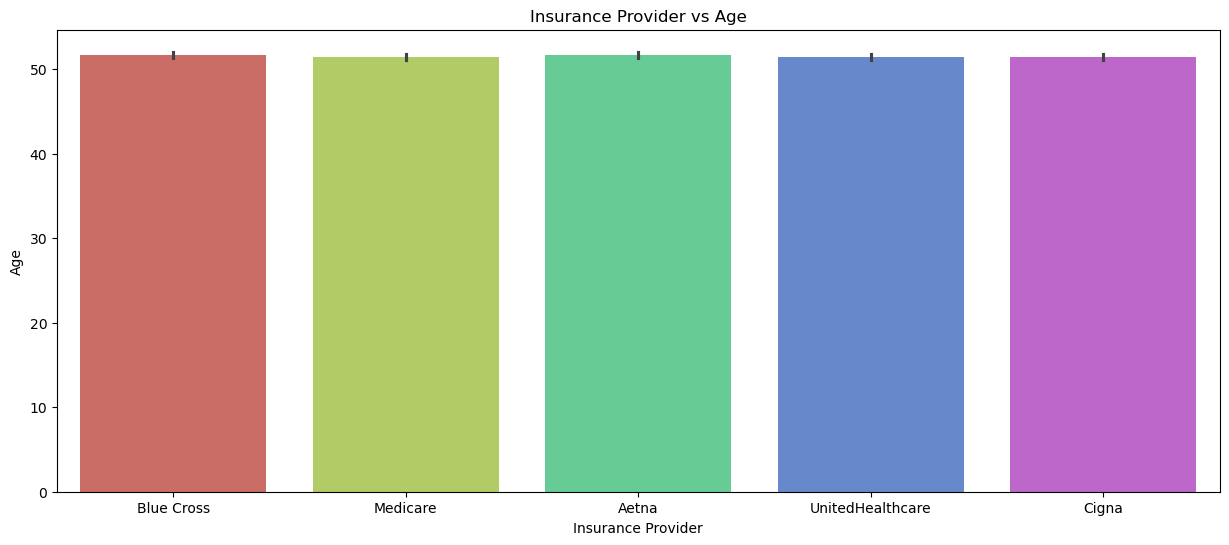

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




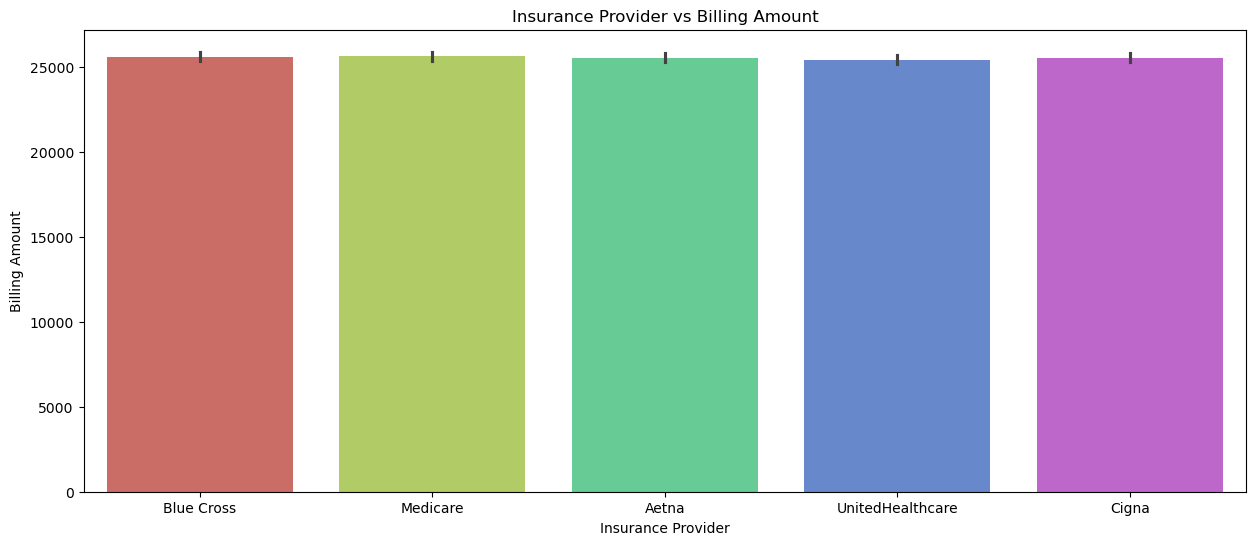

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




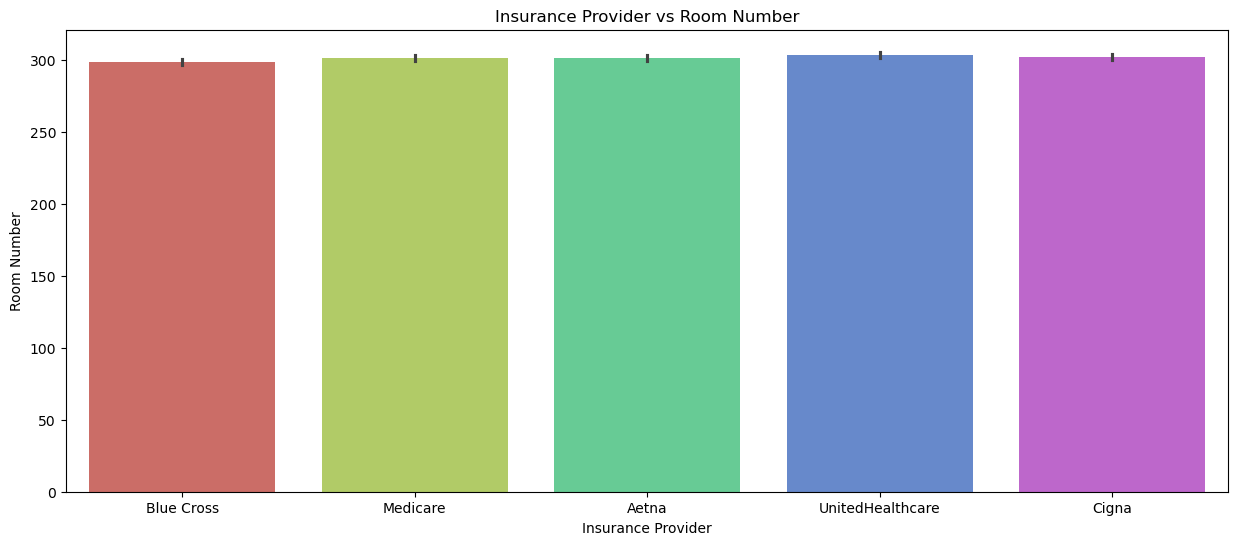

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




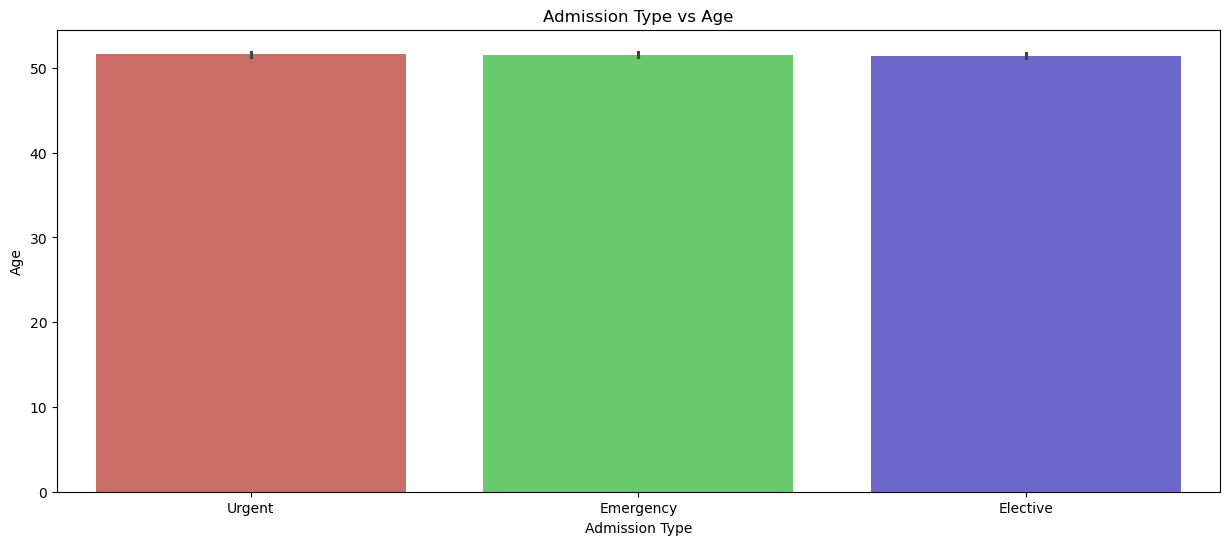

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




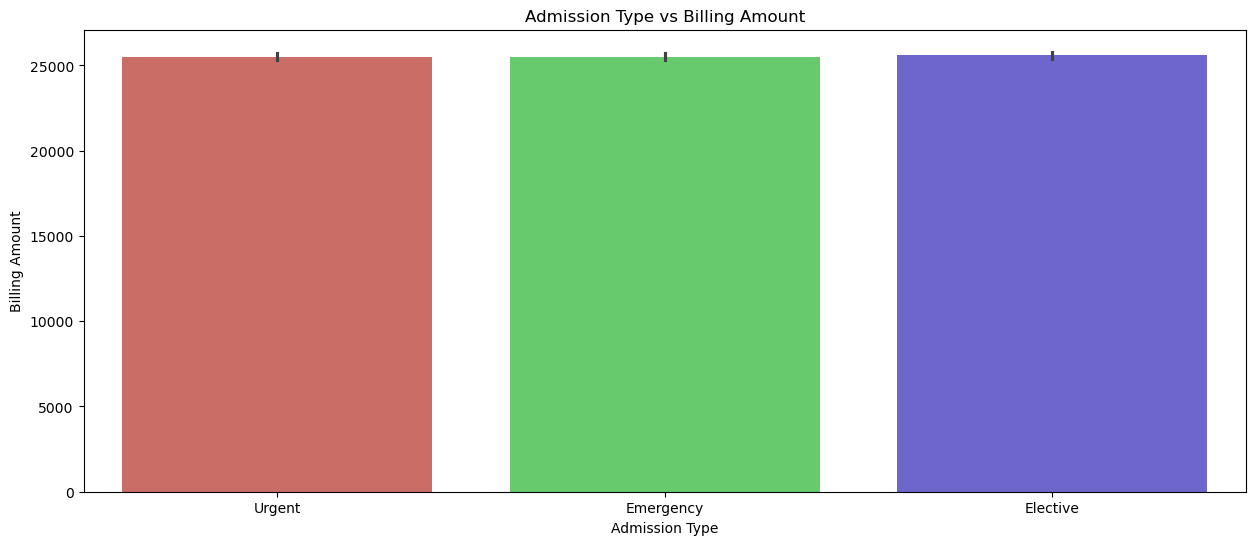

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




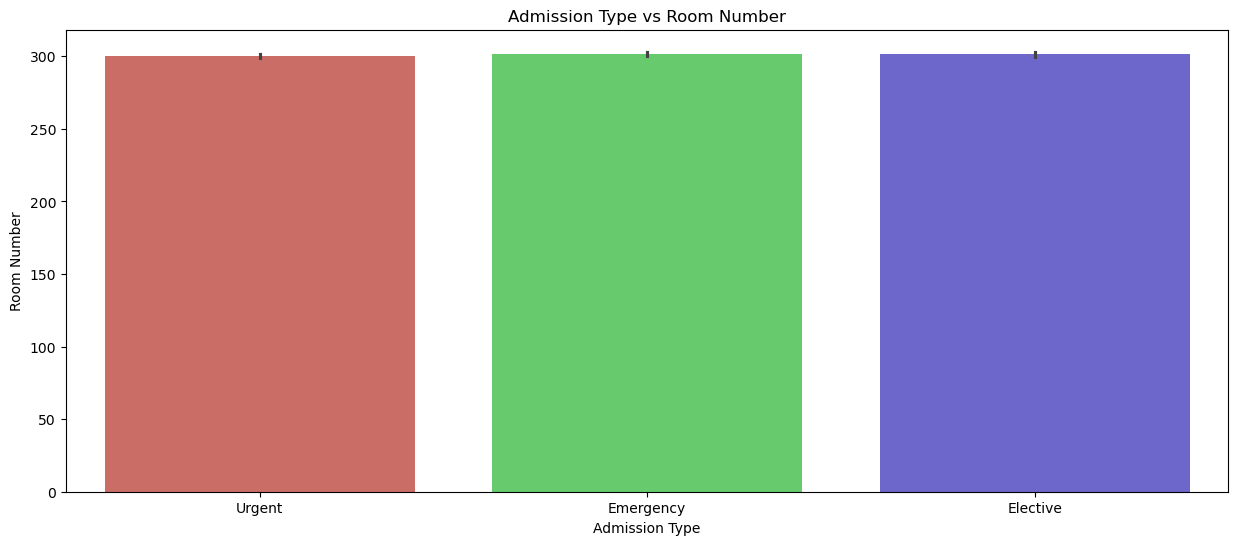

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




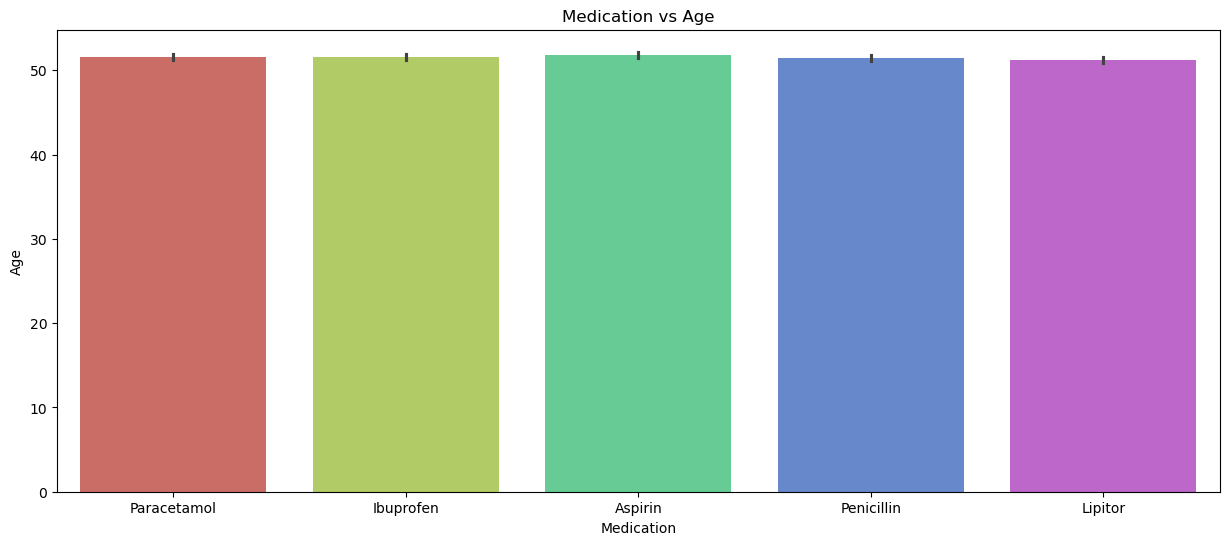

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




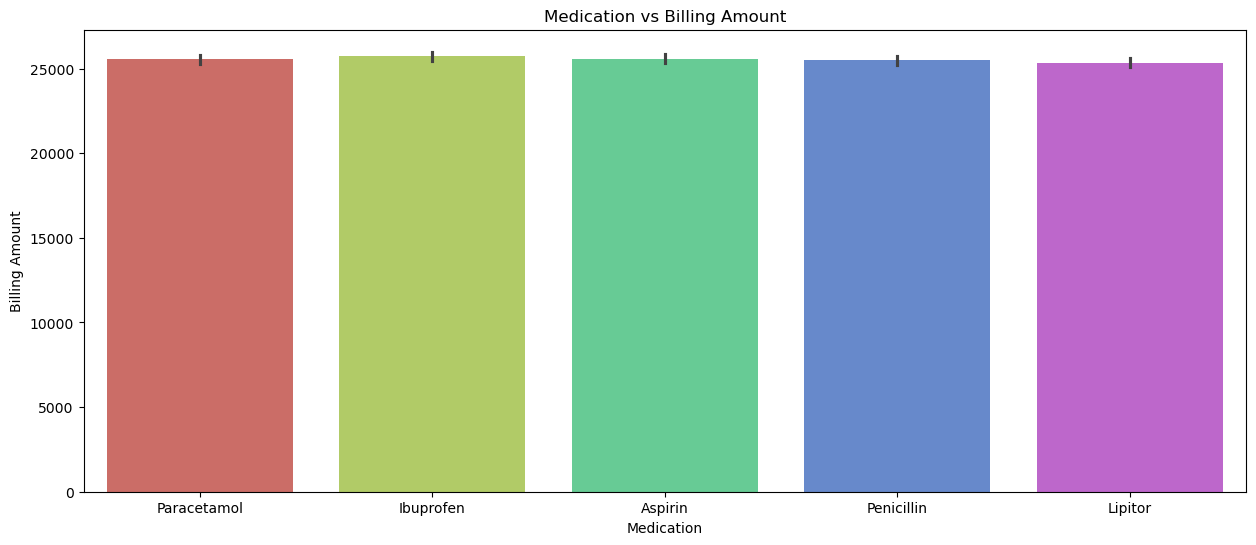

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




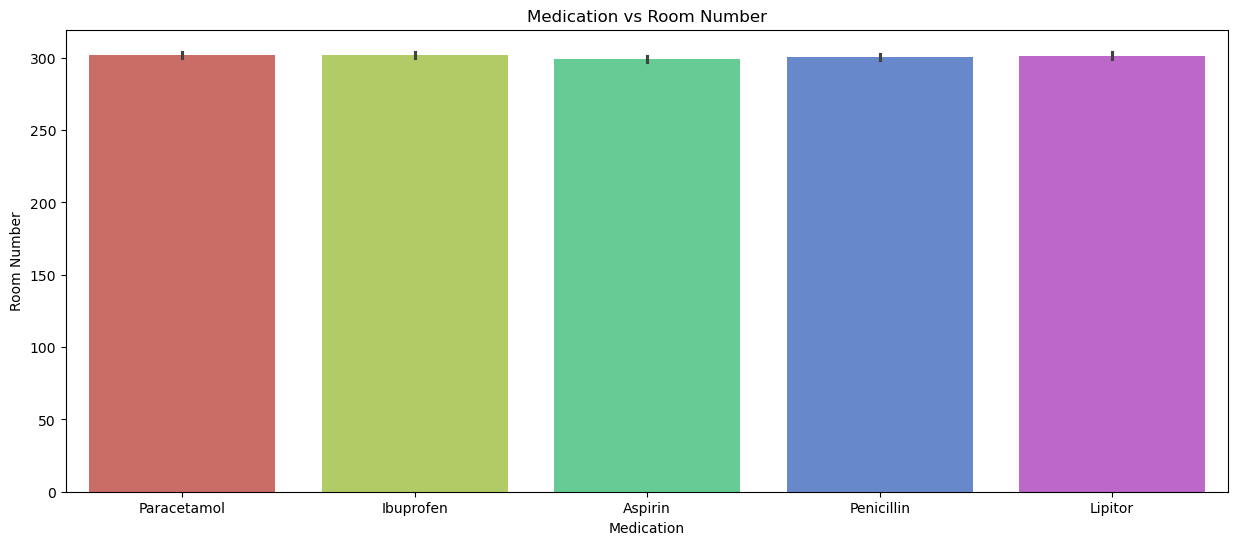

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




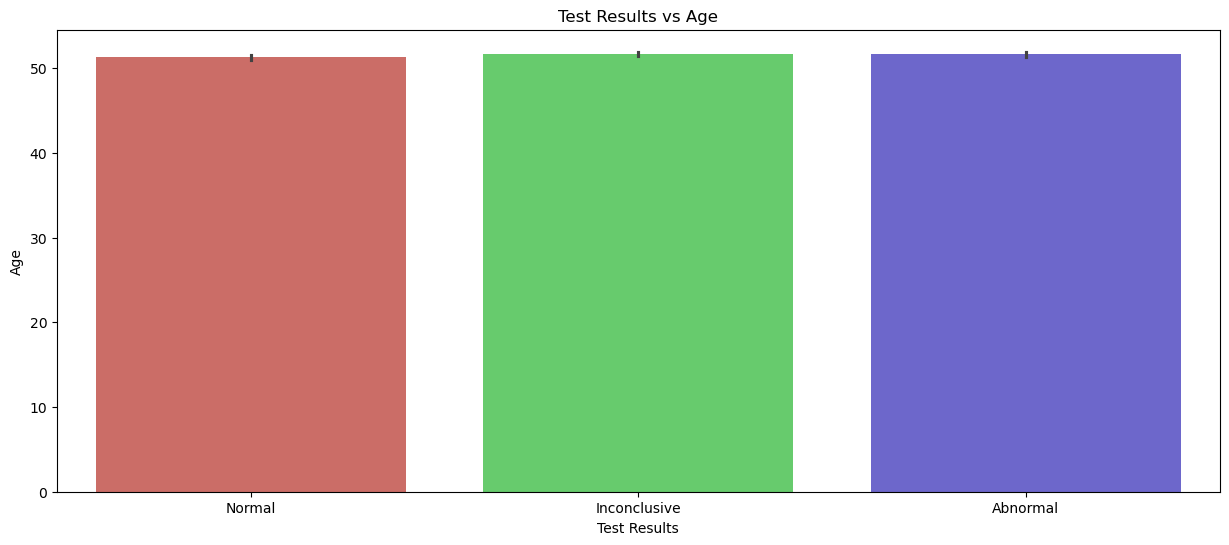

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




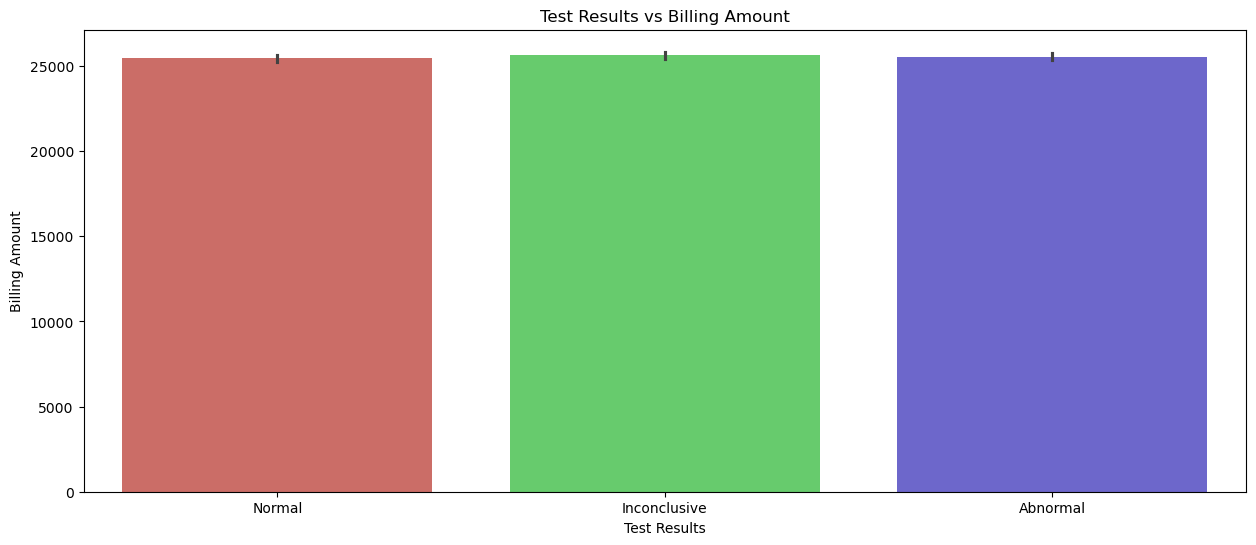

C:\Users\kisho\AppData\Local\Temp\ipykernel_17552\2334022725.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




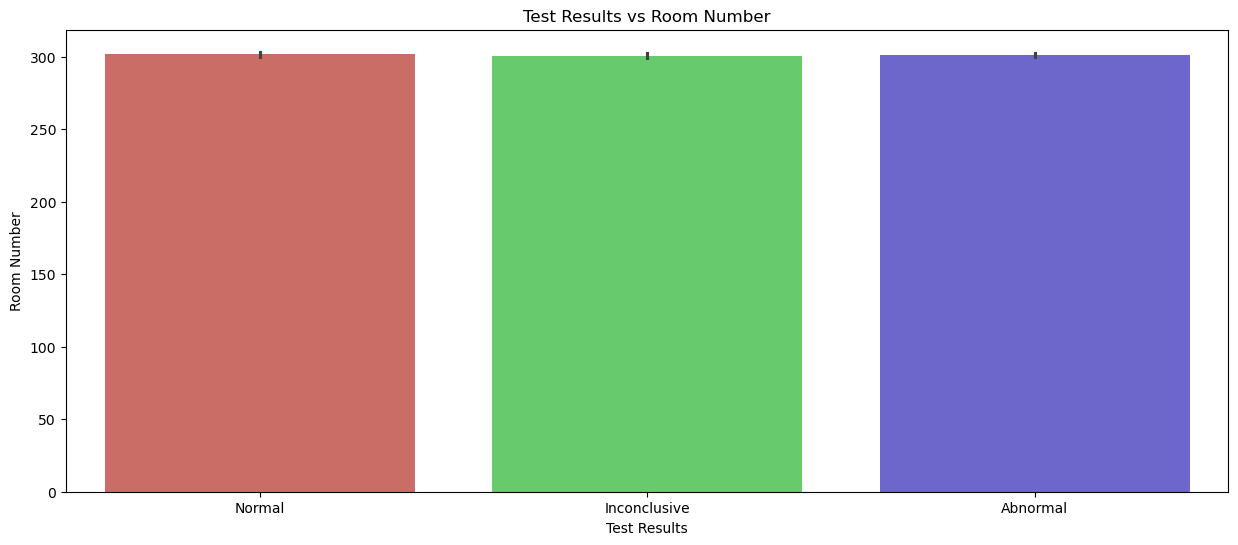

In [79]:
for dis in categorical_features:
    for con in continuous_features:
        plt.figure(figsize = (15,6))
        ax = sns.barplot( data=df,x=dis,y=con,palette='hls')
        plt.title(f'{dis} vs {con}')
        plt.show()

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}',xy = (p.get_x() + p.get_width()/2,height),xytext=(0,10), ha="center", va="bottom",fontsize=10, color='black')
            ax.set_ylabel(height)
            plt.show()
    

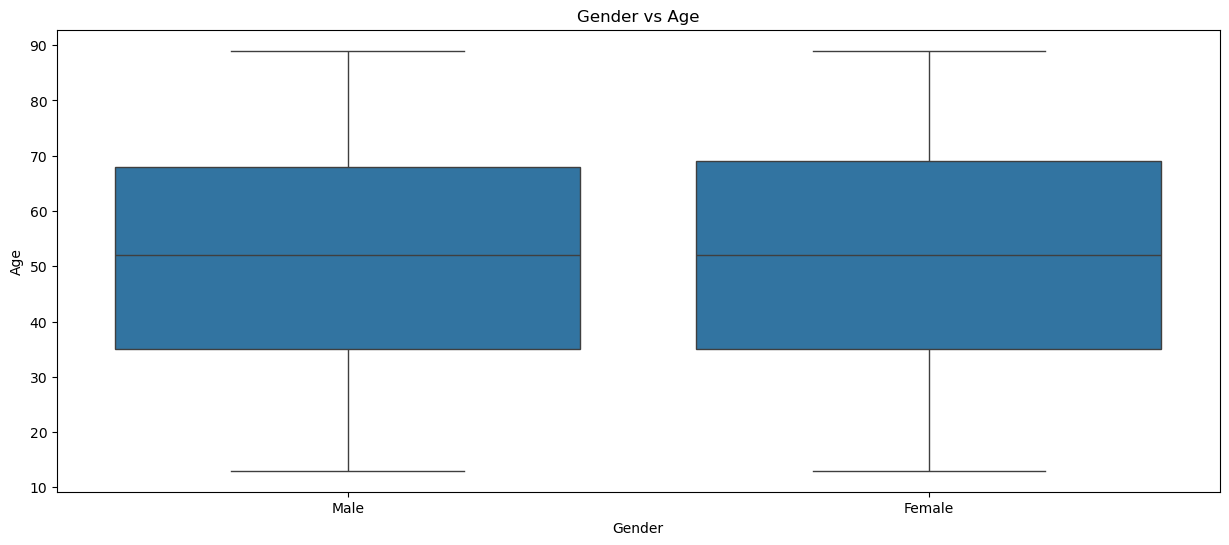

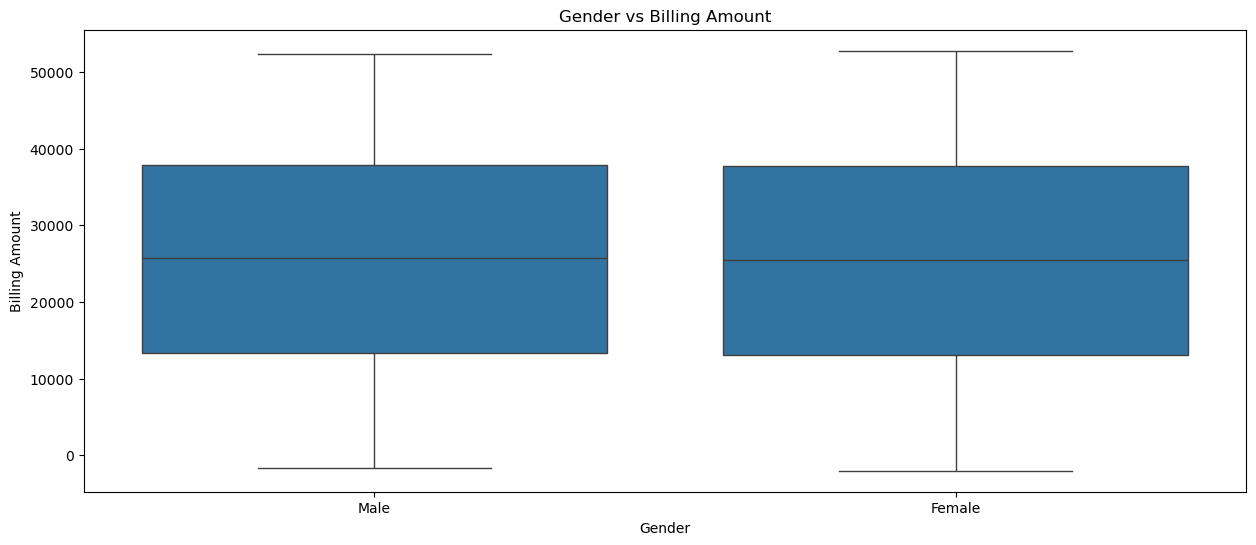

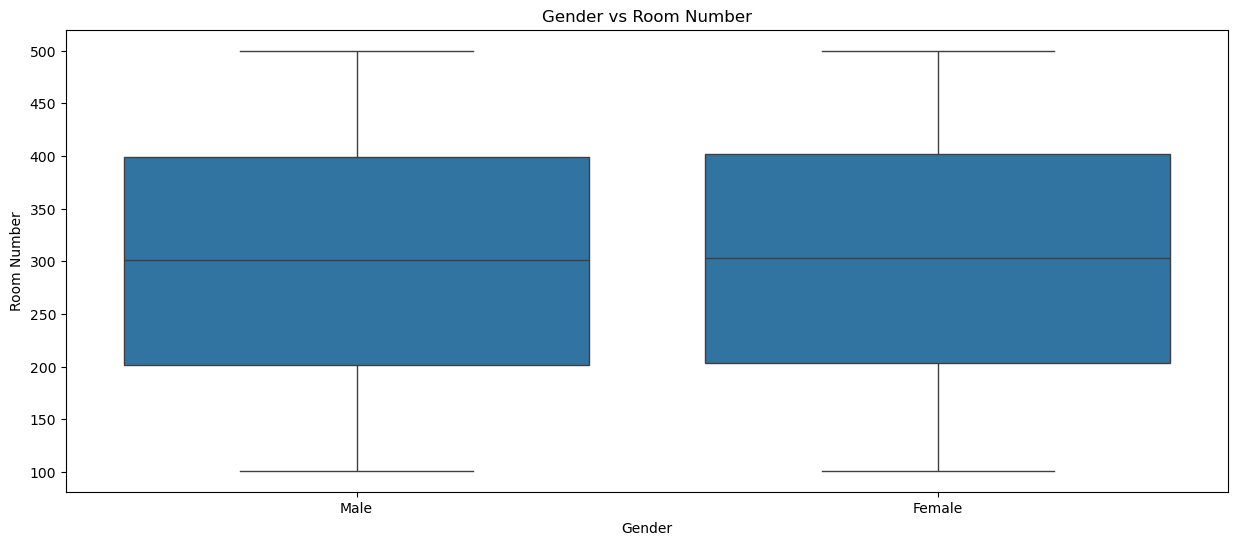

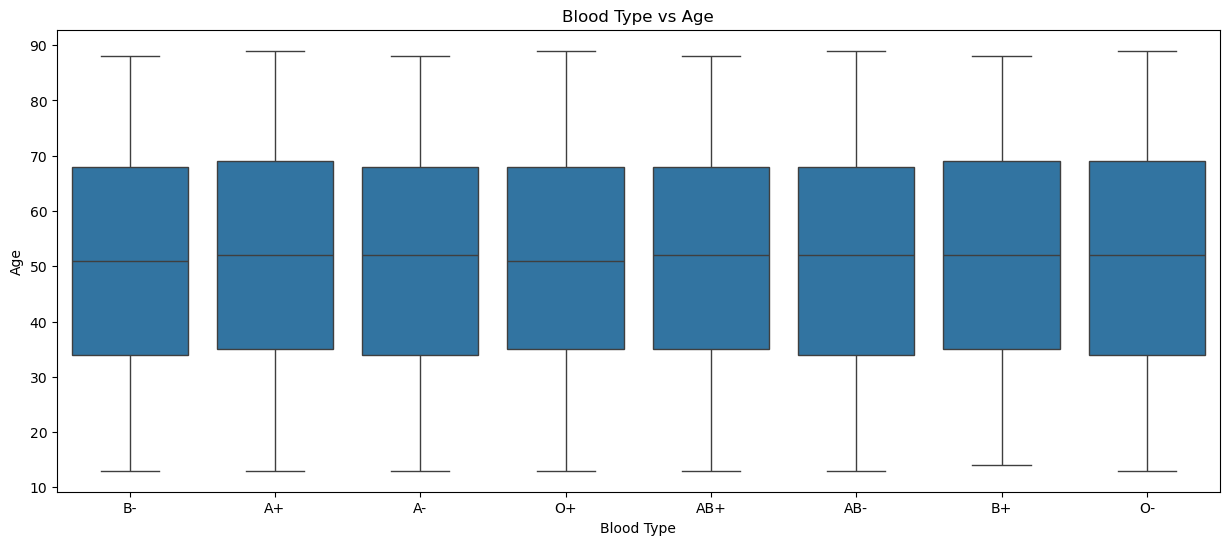

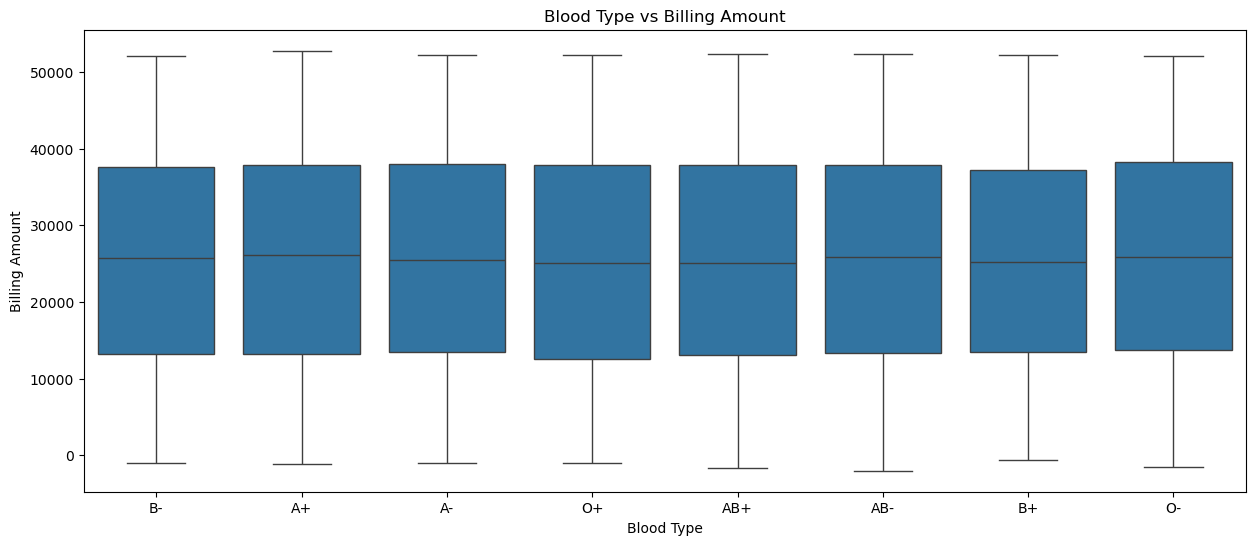

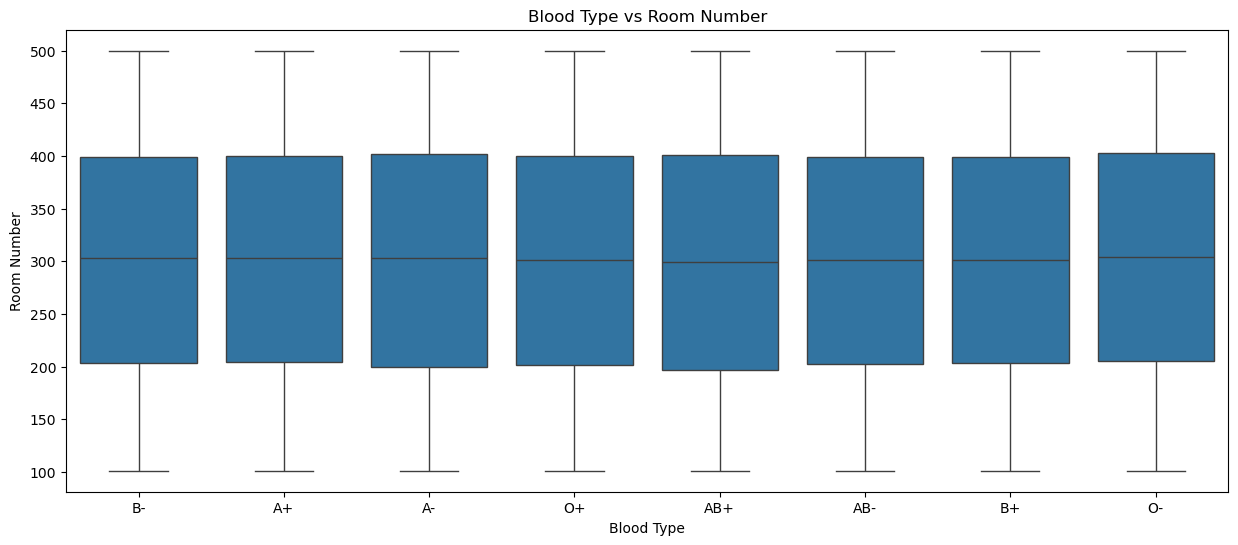

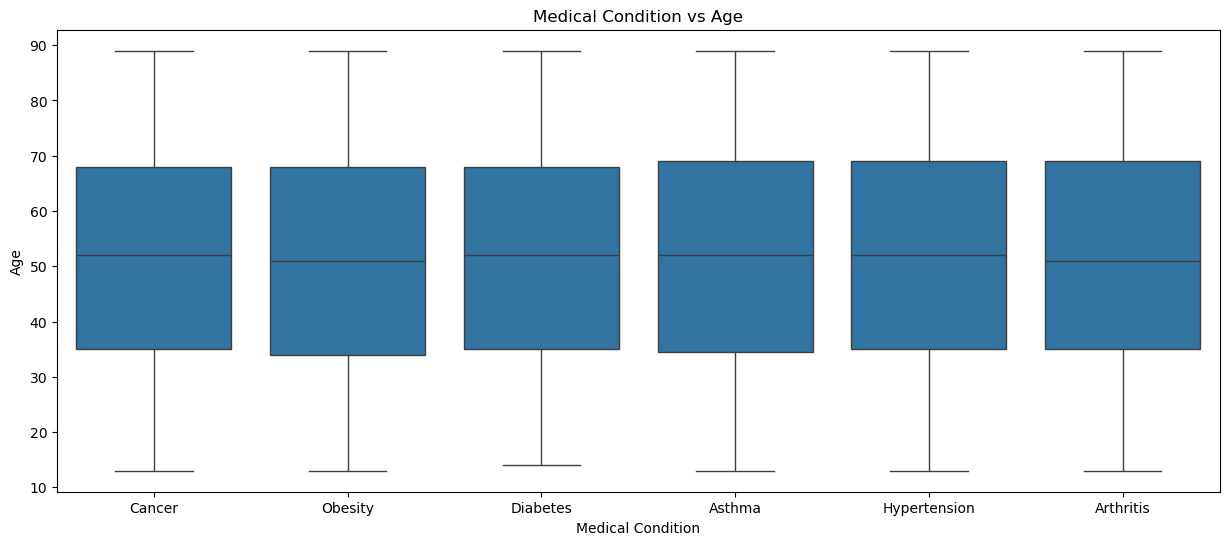

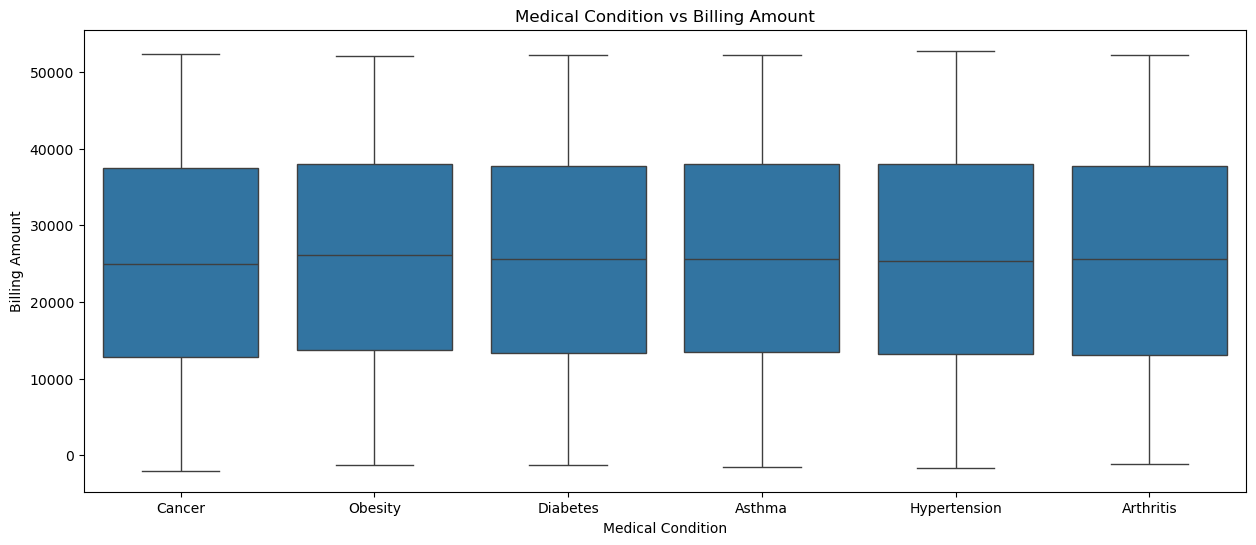

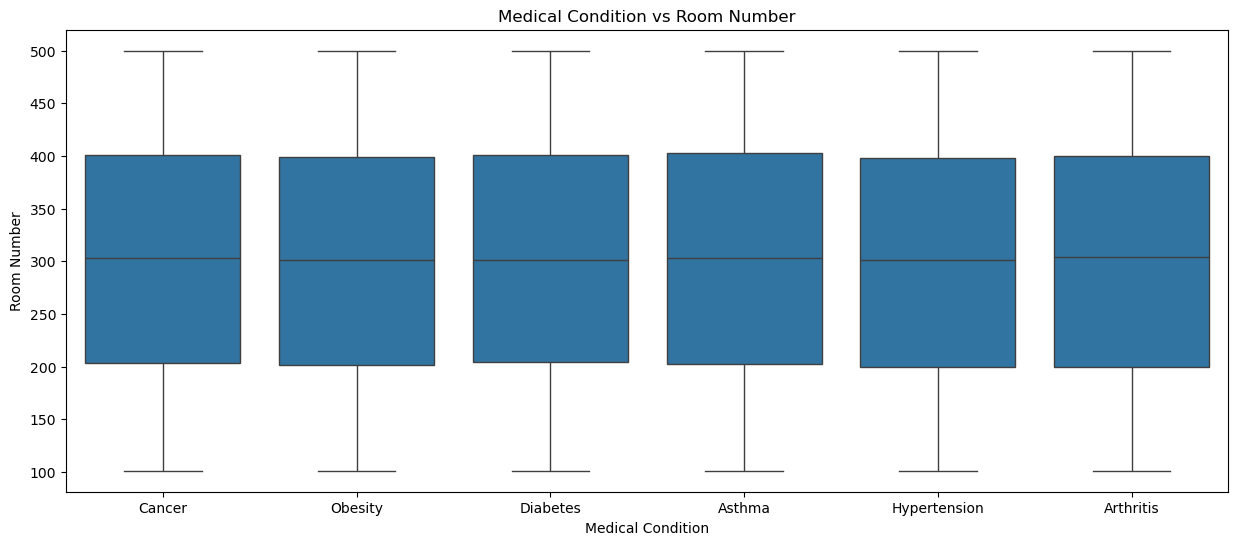

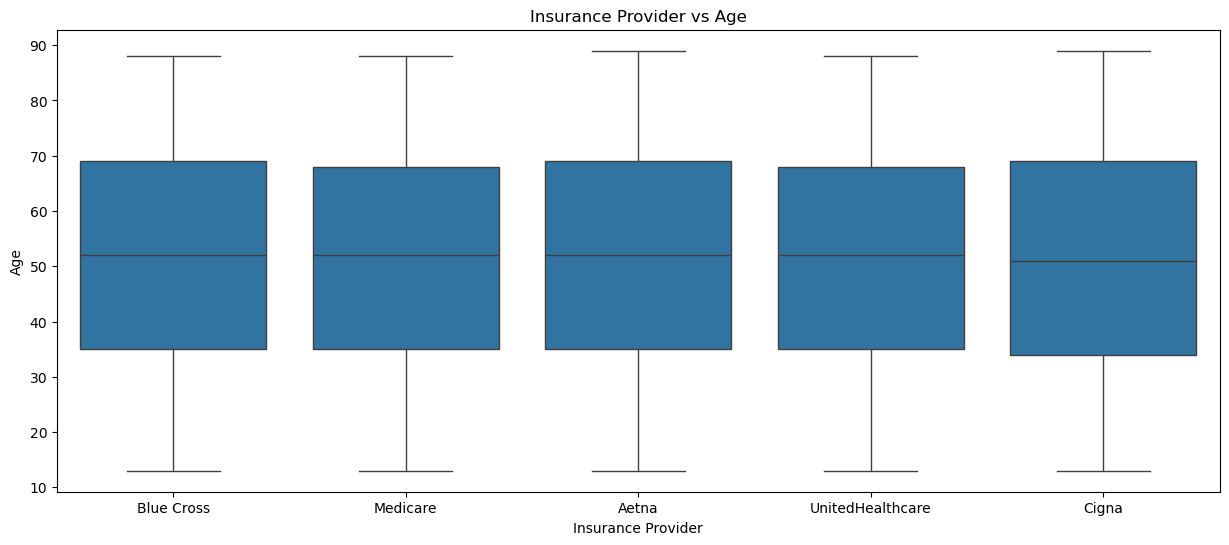

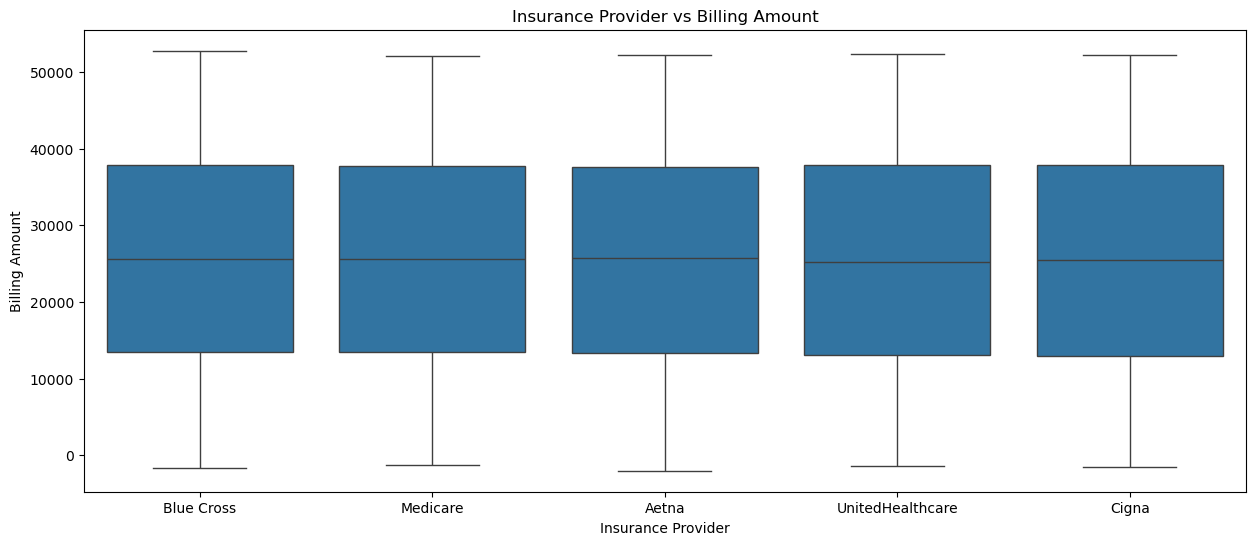

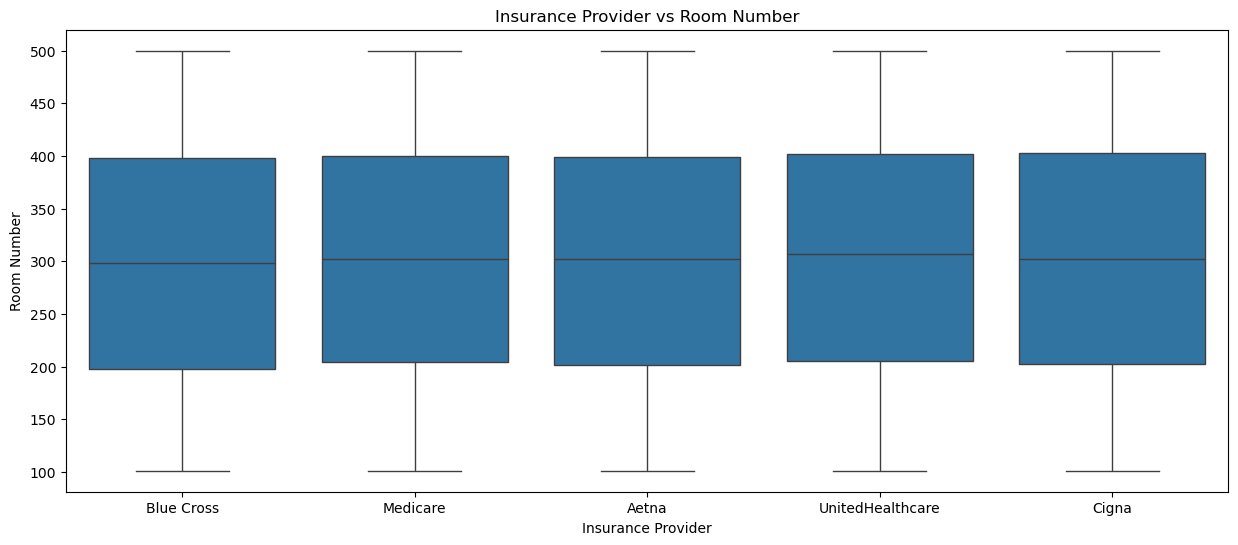

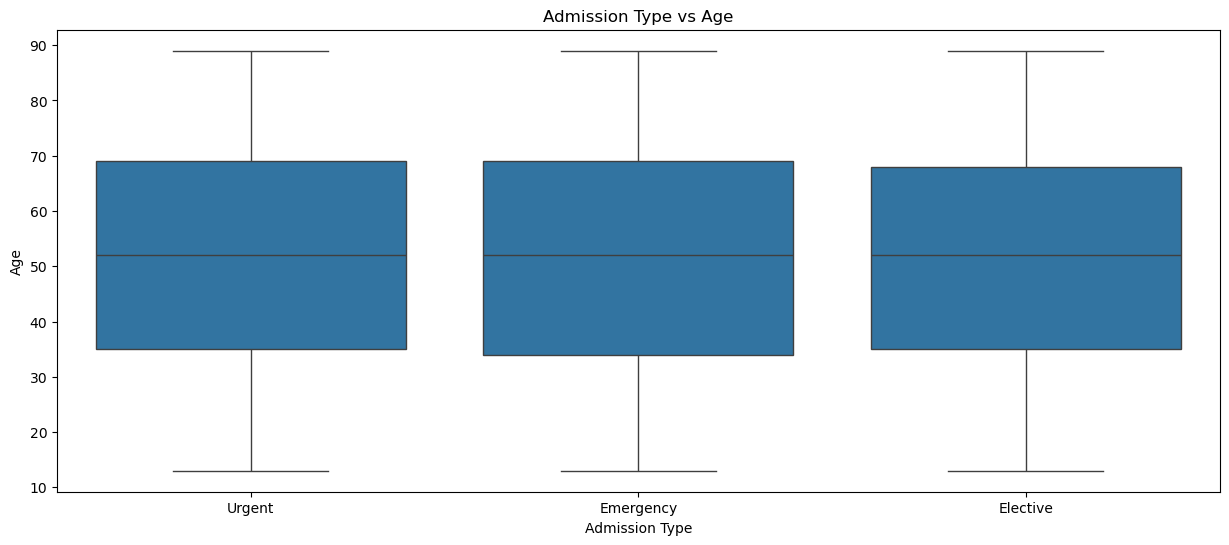

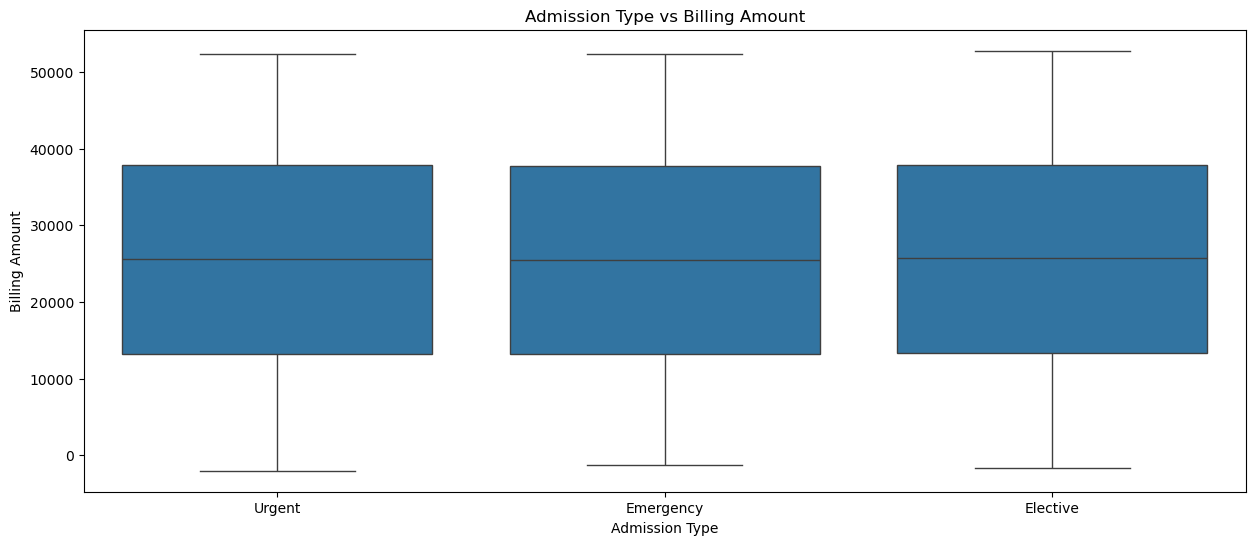

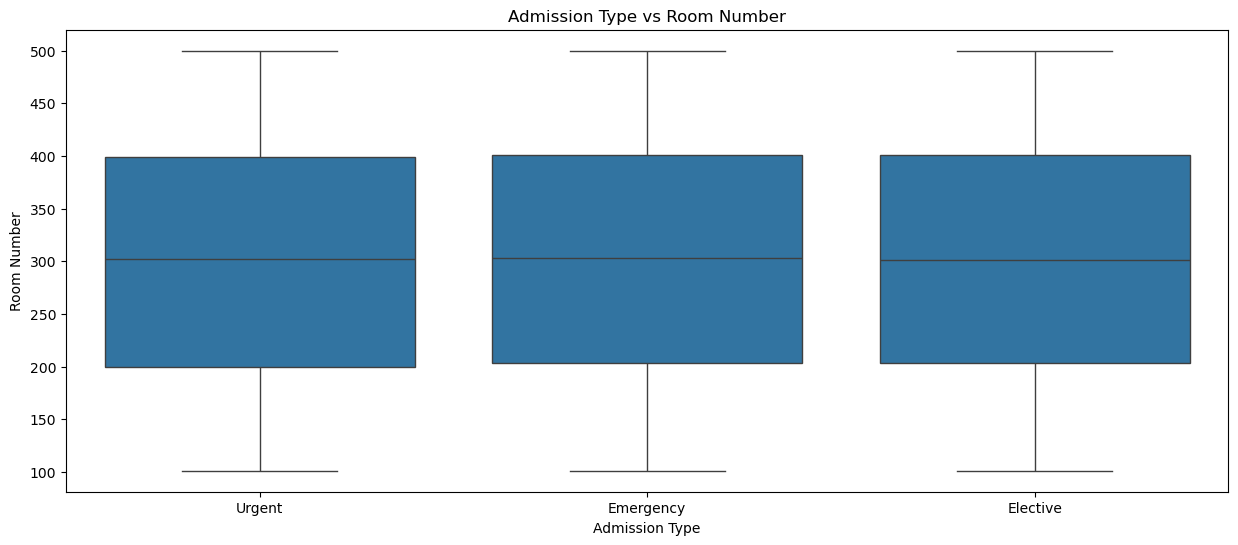

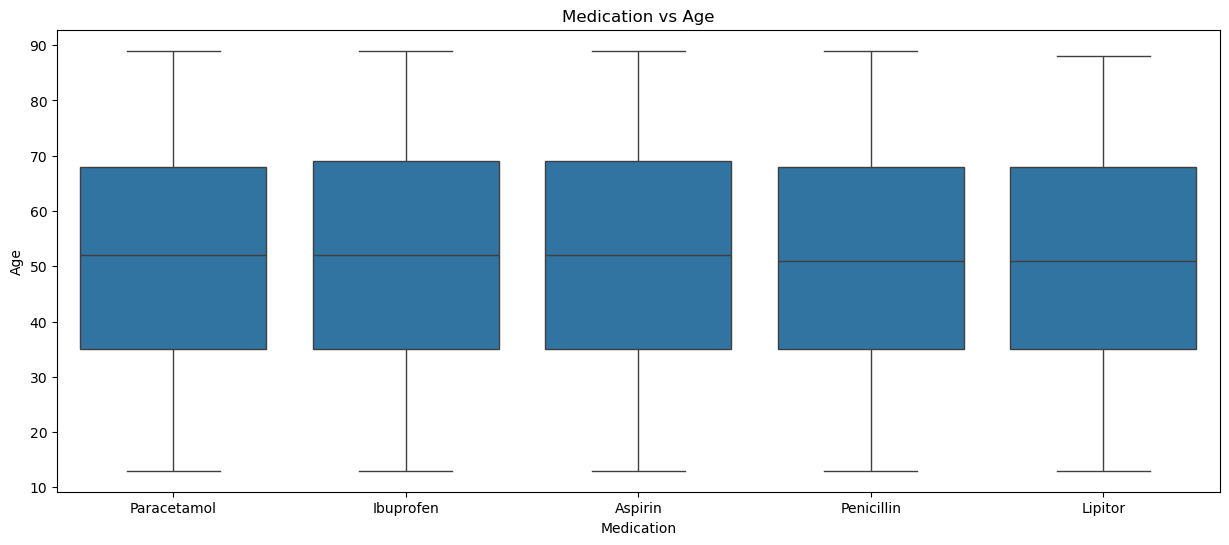

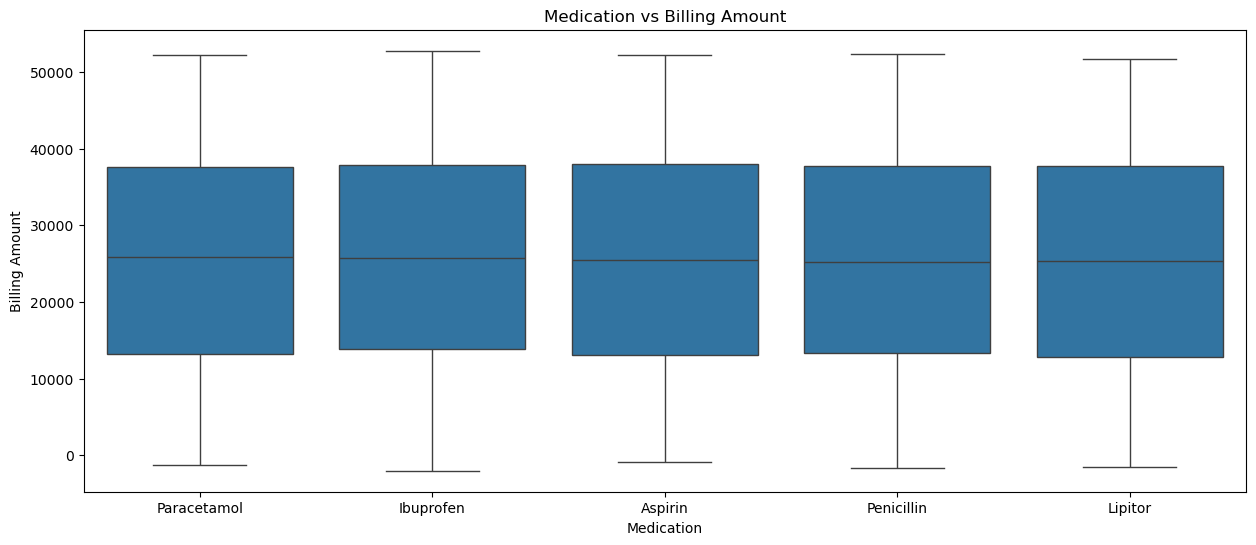

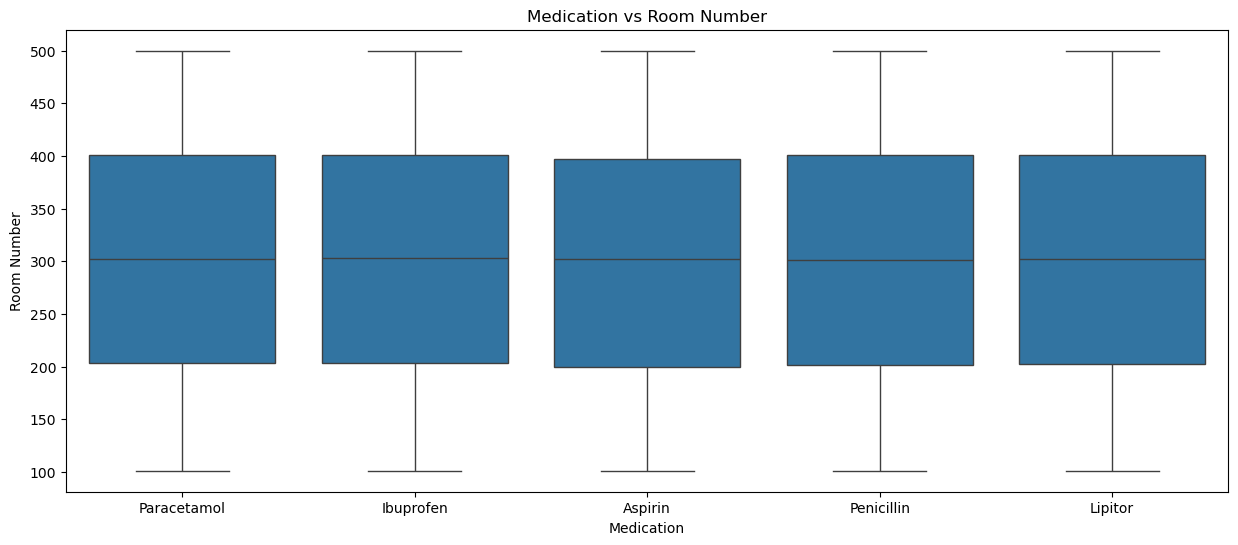

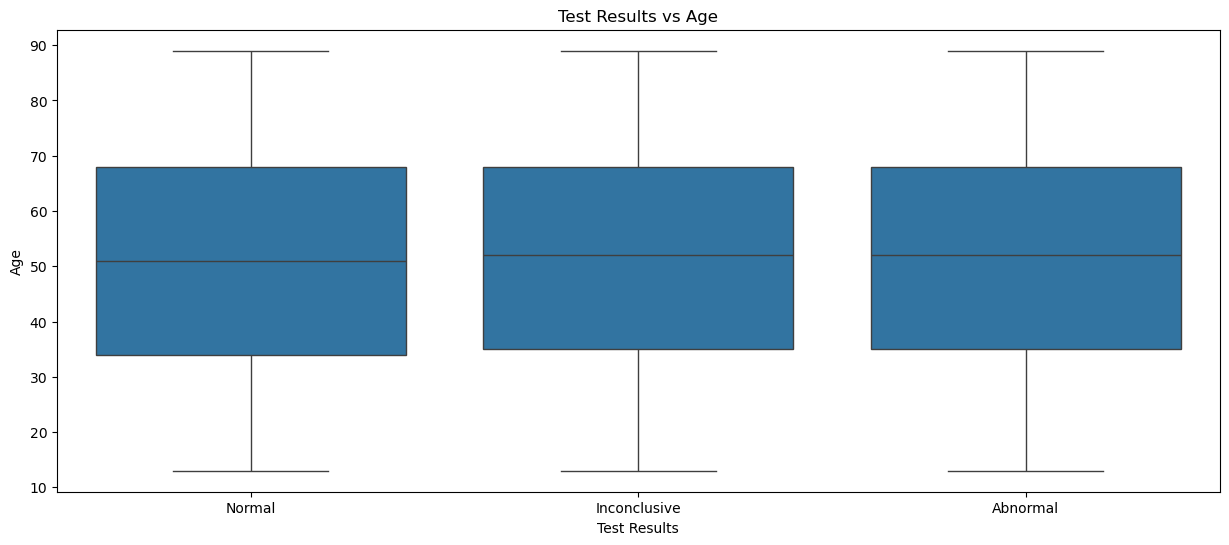

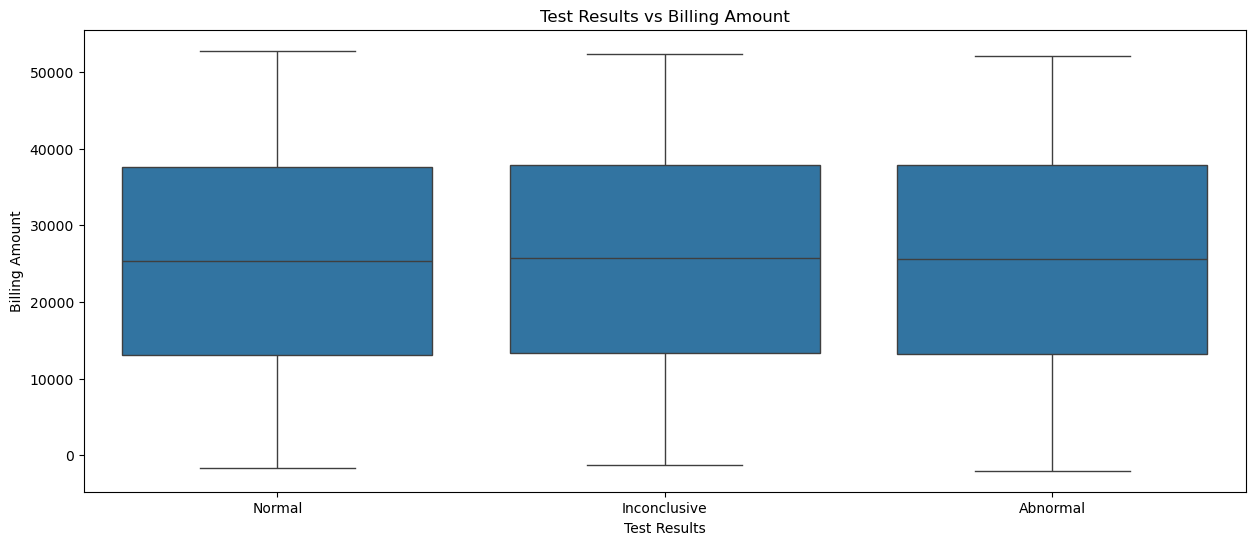

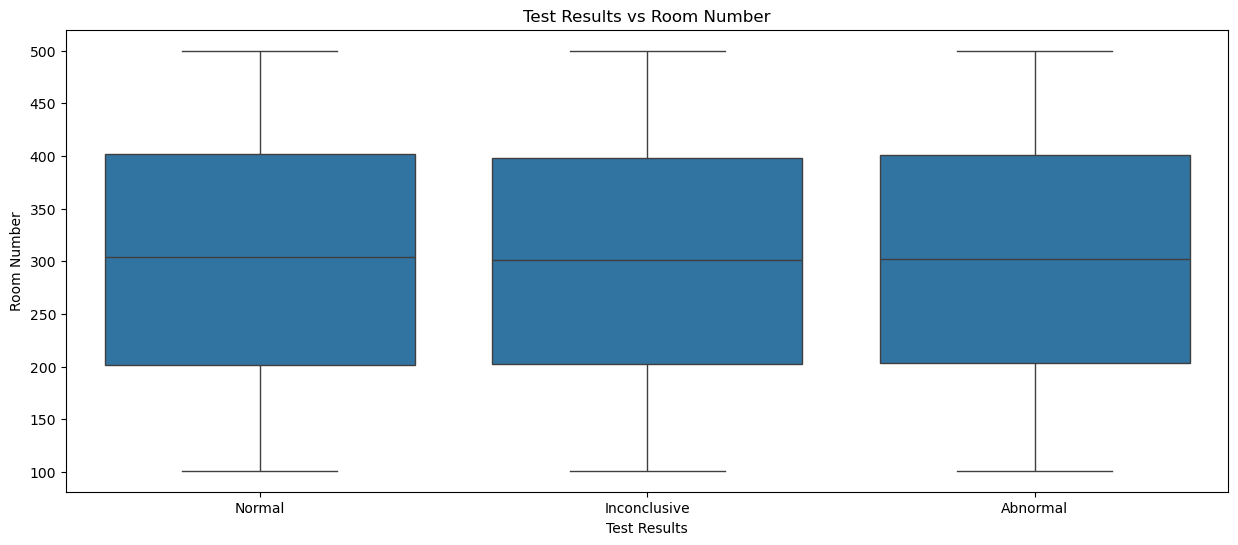

In [31]:
for dis in categorical_features:
    for con in continuous_features:
        plt.figure(figsize=(15,6))
        sns.boxplot(data= df,x = dis,y= con)
        plt.title(f'{dis} vs {con}')
        plt.show()

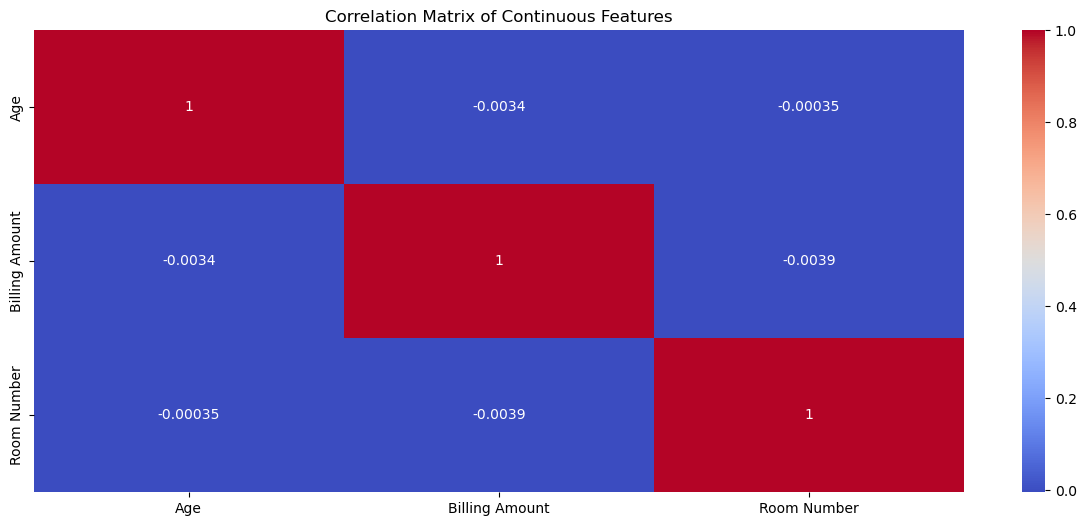

In [32]:
corr_matrix = df[continuous_features].corr()
plt.figure(figsize = (15,6))
sns.heatmap(corr_matrix,annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Continuous Features')
plt.show()

In [33]:
corr_matrix

Age  Billing Amount  Room Number
Age             1.000000       -0.003427    -0.000352
Billing Amount -0.003427        1.000000    -0.003930
Room Number    -0.000352       -0.003930     1.000000

In [101]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df[df['Gender']=='Male']['Billing Amount'], 
                         df[df['Gender']=='Female']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 1.3408137444079473, p-value = 0.24689554522480017


In [103]:
f_stat,p_val  = f_oneway(df[df['Blood Type']=='B-']['Billing Amount'],
                         df[df['Blood Type']=='A+']['Billing Amount'],
                         df[df['Blood Type']=='A-']['Billing Amount'],
                         df[df['Blood Type']=='O+']['Billing Amount'],
                         df[df['Blood Type']=='AB+']['Billing Amount'],
                         df[df['Blood Type']=='AB-']['Billing Amount'],
                         df[df['Blood Type']=='B+']['Billing Amount'],
                         df[df['Blood Type']=='O-']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 1.3149558699287003, p-value = 0.23831644878389951


In [107]:
f_stat,p_val  = f_oneway(df[df['Medical Condition']=='Cancer']['Billing Amount'],
                         df[df['Medical Condition']=='Obesity']['Billing Amount'],
                         df[df['Medical Condition']=='Diabetes']['Billing Amount'],
                         df[df['Medical Condition']=='Asthma']['Billing Amount'],
                         df[df['Medical Condition']=='Hypertension']['Billing Amount'],
                         df[df['Medical Condition']=='Arthritis']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 2.2242499906622233, p-value = 0.04904383935795031


In [141]:
f_stat,p_val  = f_oneway(df[df['Insurance Provider']=='Blue Cross']['Billing Amount'],
                         df[df['Insurance Provider']=='Medicare']['Billing Amount'],
                         df[df['Insurance Provider']=='Aetna']['Billing Amount'],
                         df[df['Insurance Provider']=='UnitedHealthcare']['Billing Amount'],
                         df[df['Insurance Provider']=='Cigna']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")


ANOVA Result: F-statistic = 0.3787399008722057, p-value = 0.8239871117559058


In [144]:
f_stat,p_val  = f_oneway(df[df['Admission Type']=='Urgent']['Billing Amount'],
                         df[df['Admission Type']=='Emergency']['Billing Amount'],
                         df[df['Admission Type']=='Elective']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

ANOVA Result: F-statistic = 0.31899845140694455, p-value = 0.7268780206920686


In [150]:

f_stat,p_val  = f_oneway(df[df['Medication']=='Paracetamol']['Billing Amount'],
                         df[df['Medication']=='Ibuprofen']['Billing Amount'],
                         df[df['Medication']=='Aspirin']['Billing Amount'],
                         df[df['Medication']=='Penicillin']['Billing Amount'],
                         df[df['Medication']=='Lipitor']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")


ANOVA Result: F-statistic = 1.21962605658176, p-value = 0.30000600926890775


In [91]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [97]:
categorical_features

['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']

In [99]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [93]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [109]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [146]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [95]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [152]:
from scipy.stats import chi2_contingency

In [154]:
contingency_table = pd.crosstab(df['Admission Type'],df['Medical Condition'])
contingency_table

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Admission Type                                                               
Elective                3062    3069    3114      3031          3182     3015
Emergency               3073    2978    2988      2988          2975     3100
Urgent                  3083    3048    3038      3197          2994     3031

In [156]:
chi2,p,dof,ex = chi2_contingency(contingency_table)
print(f'Chi-square test result: chi2 = {chi2},p-value = {p}')

Chi-square test result: chi2 = 17.8903466905814,p-value = 0.05684174826535973


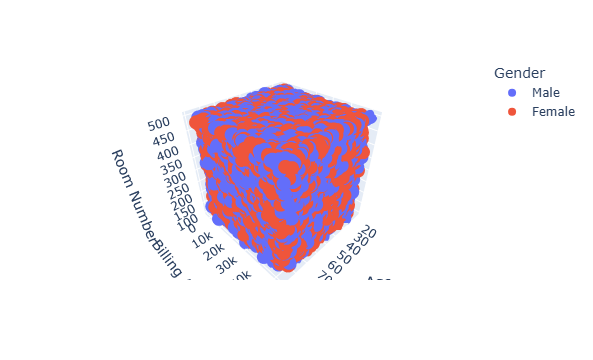

In [160]:
fig = px.scatter_3d(df,x= 'Age',y='Billing Amount',z = 'Room Number',color = 'Gender')
fig.show()